# Librerias

In [64]:
# Cargar las librerias de Python

import matplotlib.pyplot as plt # crear graficos https://matplotlib.org/
from matplotlib import pyplot
import seaborn as sns # para crear graficos parecido a ggplot2 de R  https://seaborn.pydata.org/examples/index.html
# para instalar plotly: pip install plotly
import plotly.express as px # para graficos interactivos https://plotly.com/python/

#v=1.21.4
import numpy as np # manipulacion de vectores https://numpy.org/
import pandas as pd # manipulacion de dataframes igual R https://pandas.pydata.org/getting_started.html
import missingno as msno # visualizar los valors NAs


# # Librerías estadísticas:
# #-------------------------------------------------------------------------------------------------

import pingouin as pg # paquete estadístico para test estadísticos: ANOVA, Chi Square,...
import statsmodels.api as sm # paquete de modelos estadísticos muy potente

# pip install scikit-learn
from sklearn.feature_selection import mutual_info_classif #mututal information de las variables

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Librerías machine learning:
#-------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report  # cálculo matriz de confusión
from sklearn.metrics import confusion_matrix # cálculo matriz de confusión
from sklearn.metrics import accuracy_score # acruracy
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # árbol de clasificación en sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
plt.rcParams["figure.figsize"] = (6, 4) # cambiar el tamano de las figuras

In [66]:
#pd.set_option('display.max_rows', None) # mostrar todas las filas del data frame

#  Lectura de datos

Las columnas se corresponden con:
    
    .- edad: indica la edad del asegurado.
    .- tipo_empleo: indica el tipo de empleo que tiene el asegurado.
    .- universitario: indica si el asegurado tiene estudios universitarios.
    .- ingresos: indica los ingresos anuales del asegurado.
    .- num_familia: indica el número de miembros de la familia del asegurado.
    .- enfermedad: indica si el asegurado tiene alguna enfermedad cronica.
    .- frecuente: indica si el asegurado viaja frecuentemente.
    .- extranjero: indica si el asegurado viaja al extranjero.
    .- contratar: indica si el asegurado contrata o no el seguro de viaje.

In [67]:
misdatos = pd.read_csv('../dataset/viajes.csv')
misdatos

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [68]:
misdatos.shape

(1987, 10)

In [69]:
misdatos.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [70]:
# renombrar las columnas del dataframe
misdatos.rename(columns = {'Age':'edad',
                                      'Employment Type':'tipo_empleo',
                                      'GraduateOrNot':'universitario',
                                      'AnnualIncome':'ingresos',
                                      'FamilyMembers':'num_familia',
                                      'ChronicDiseases':'enfermedad',
                                      'FrequentFlyer':'frecuente',
                                      'EverTravelledAbroad':'extranjero',
                                      'TravelInsurance':'contratar'
                                     }, inplace = True)
misdatos.columns

Index(['Unnamed: 0', 'edad', 'tipo_empleo', 'universitario', 'ingresos',
       'num_familia', 'enfermedad', 'frecuente', 'extranjero', 'contratar'],
      dtype='object')

In [71]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
misdatos.isnull().sum()

Unnamed: 0       0
edad             0
tipo_empleo      0
universitario    0
ingresos         0
num_familia      0
enfermedad       0
frecuente        0
extranjero       0
contratar        0
dtype: int64

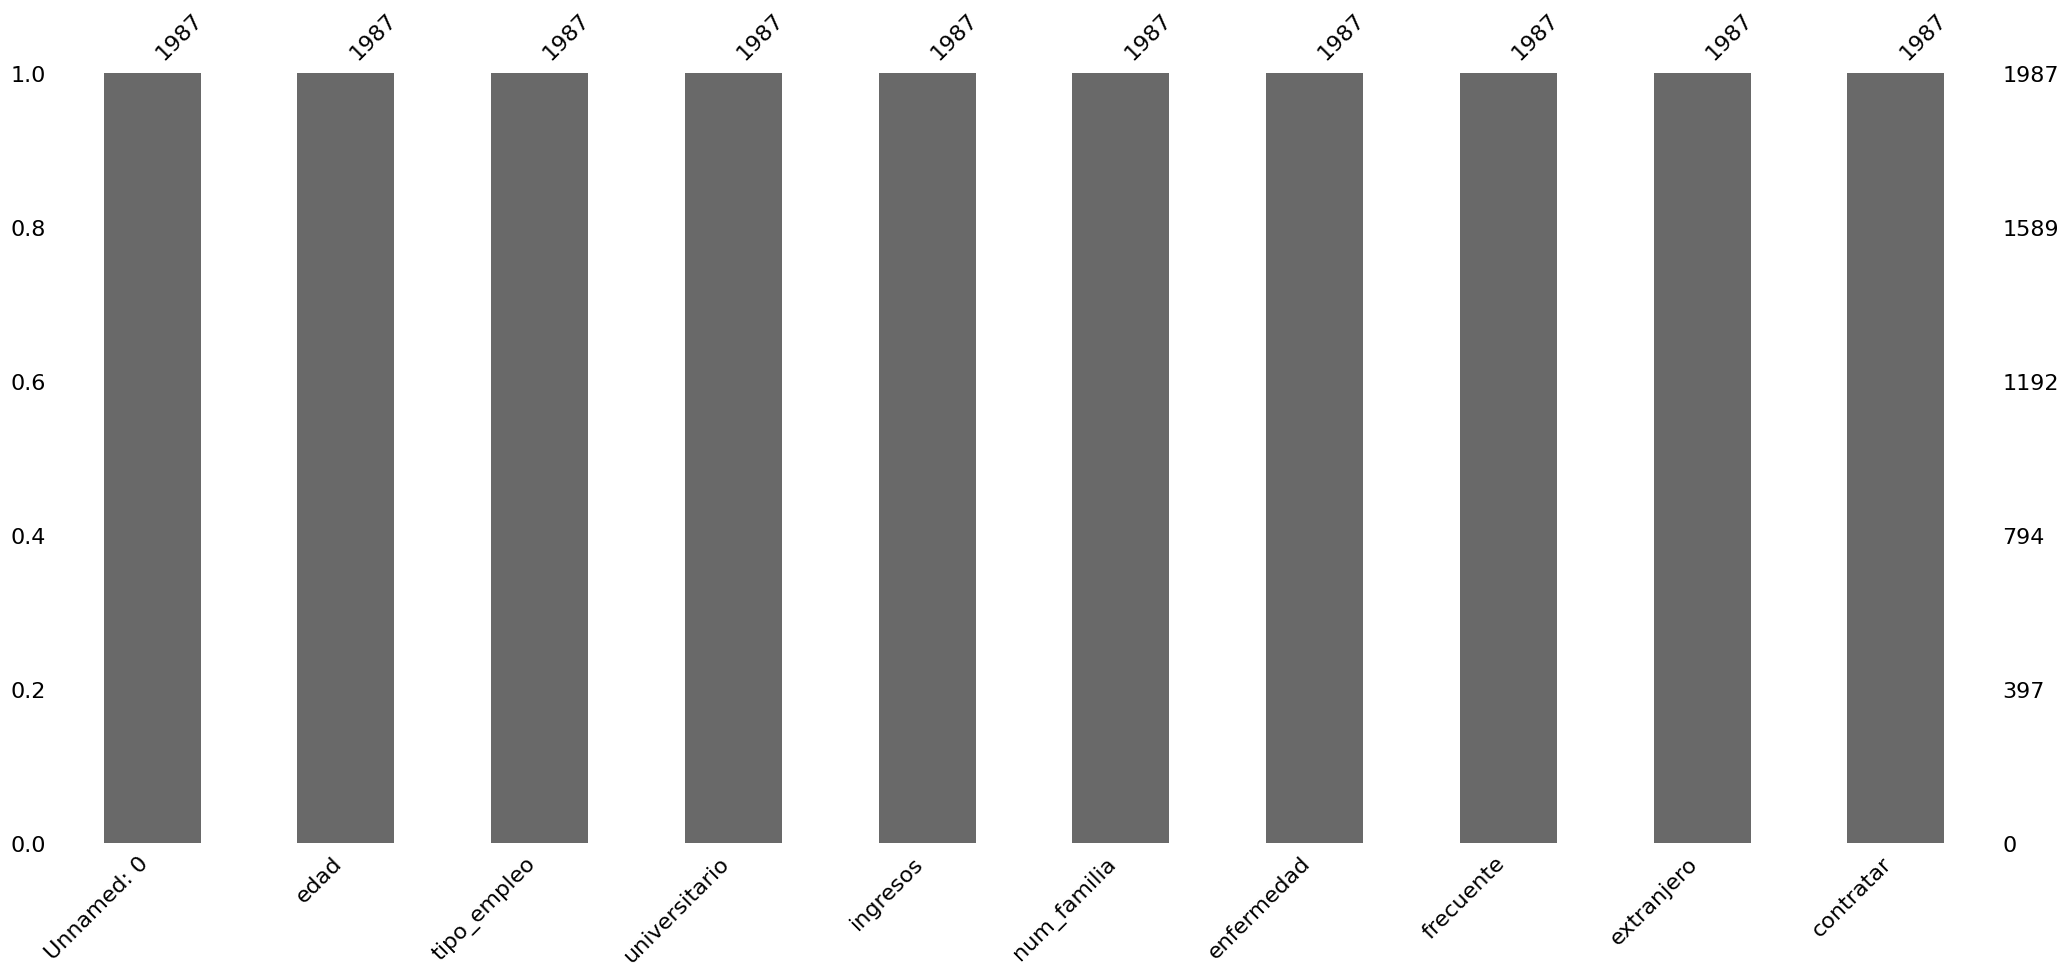

In [72]:
# Barplot de los nans
msno.bar(misdatos)
plt.show()

#  Exploración univariada

La exploración univariada consisten en dibujar las distribuciones y calcular los estadísticos de las variables una a una.

In [73]:
data = misdatos.copy()
data.shape

(1987, 10)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1987 non-null   int64 
 1   edad           1987 non-null   int64 
 2   tipo_empleo    1987 non-null   object
 3   universitario  1987 non-null   object
 4   ingresos       1987 non-null   int64 
 5   num_familia    1987 non-null   int64 
 6   enfermedad     1987 non-null   int64 
 7   frecuente      1987 non-null   object
 8   extranjero     1987 non-null   object
 9   contratar      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [75]:
# transformar las variables
data['enfermedad'] = data['enfermedad'].astype('object')
data['contratar'] = data['contratar'].astype('object')
# eliminar la variable id
del(data['Unnamed: 0'])

In [76]:
data.head(5)

,edad,tipo_empleo,universitario,ingresos,num_familia,enfermedad,frecuente,extranjero,contratar
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


##  Explorar la variable de salida: contratar

In [77]:
# Identificar variable respuesta
respuesta = np.array(['contratar'])
respuesta = respuesta.astype(object)
respuesta

array(['contratar'], dtype=object)

*************************************************
Variable = contratar
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
0               0.642677                   1277
1               0.357323                    710


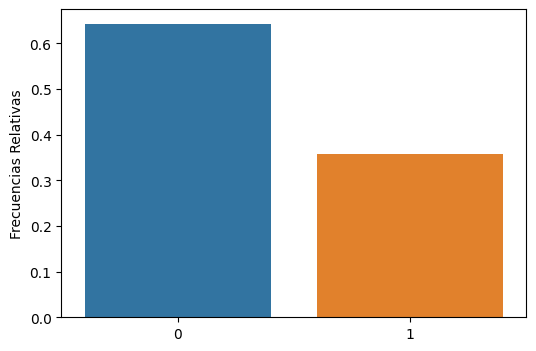

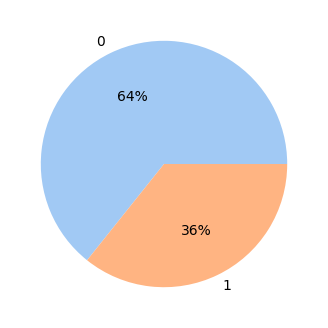

In [78]:
i = respuesta[0]
print("*************************************************")
print("Variable = "+i)
print("*************************************************")
# 1. La tabla de frecuencias de la variable i
pct = pd.DataFrame(data[i].value_counts(normalize=True))
pct.columns = ['Frecuencias Relativas']
pct["Frecuencias Absolutas"] = data[i].value_counts()
print(pct)

# 2. Barplot de la variable i
sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
#definir el tamaño del plot
# plt.figure(figsize=(4,2))
plt.show()

# 3. Pieplot de la variable i
frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
#definir el tamaño del plot
# plt.figure(figsize=(4,2))
plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
plt.show()

## Explorar todas las variables cuantitativas y sus correlaciones

In [79]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

edad              True
tipo_empleo      False
universitario    False
ingresos          True
num_familia       True
enfermedad       False
frecuente        False
extranjero       False
Name: 0, dtype: bool

In [80]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') |
                                                        (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,edad
1,ingresos
2,num_familia


In [81]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[var_num].mean()
mediana = data[var_num].median()
maximo = data[var_num].max()
minimo = data[var_num].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[var_num].std()
q1 = data[var_num].quantile(0.25)
q3 = data[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
edad,29.650226,29.0,35,25,2.913308,28.0,32.0,4.0,1987,0.065356,29.522128,29.778325
ingresos,932762.959235,900000.0,1800000,300000,376855.684748,600000.0,1250000.0,650000.0,1987,8454.270462,916192.589130,949333.329340
num_familia,4.752894,5.0,9,2,1.609650,4.0,6.0,2.0,1987,0.036110,4.682117,4.823670


C:\Users\Admin\AppData\Local\Temp\ipykernel_1436\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


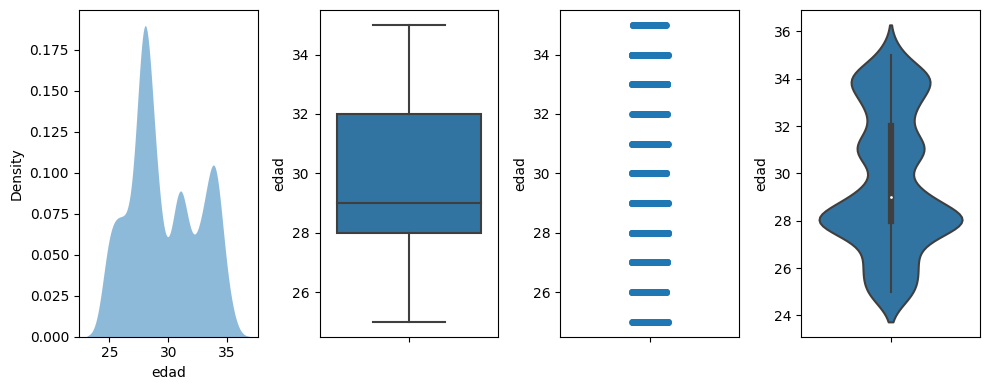

C:\Users\Admin\AppData\Local\Temp\ipykernel_1436\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


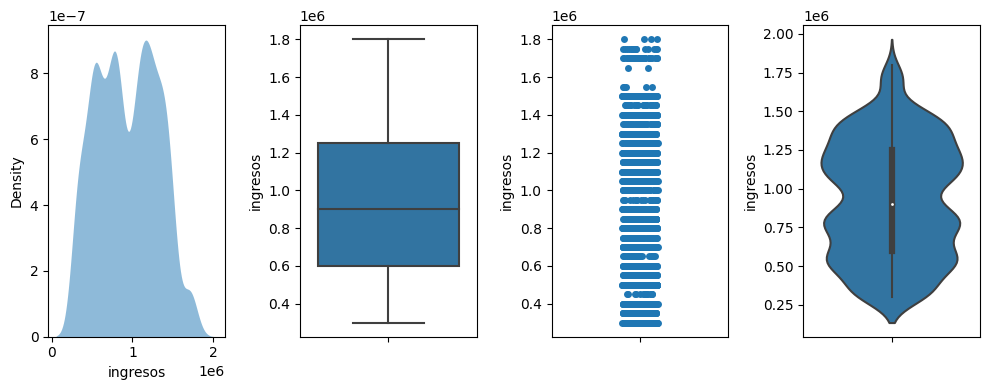

C:\Users\Admin\AppData\Local\Temp\ipykernel_1436\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


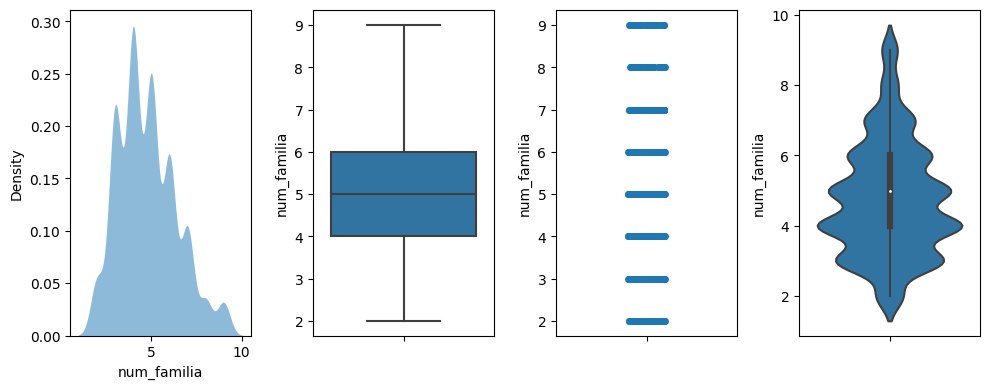

In [82]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

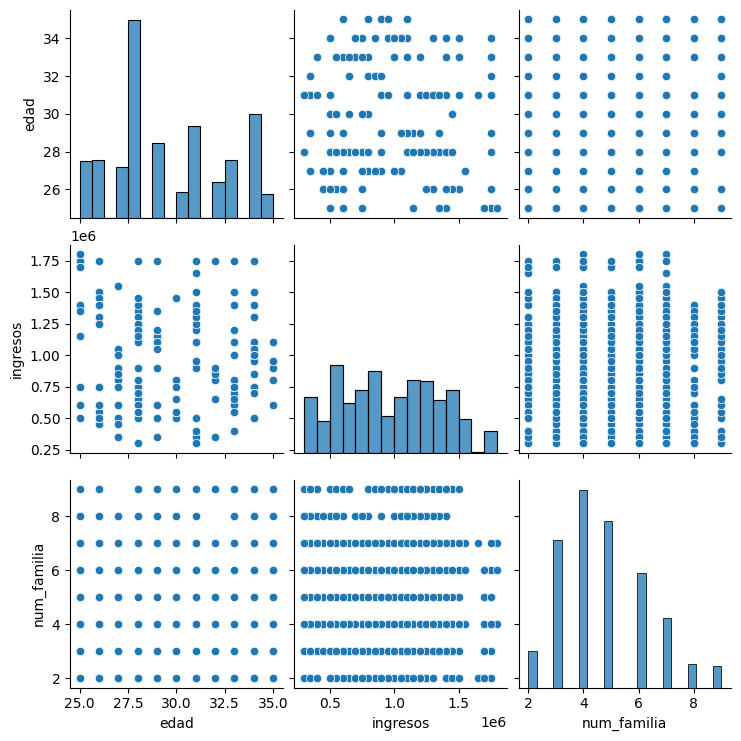

In [83]:
# Matrixplot
# seaborn
sns.pairplot(data[var_num])
plt.show()

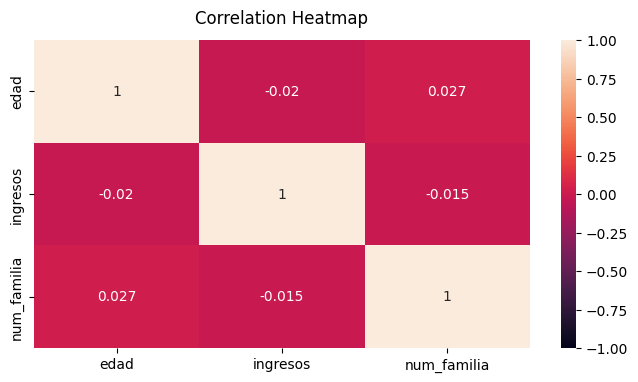

In [84]:
# Correlograma:
X = data[var_num]

# Increase the size of the heatmap.
plt.figure(figsize=(8, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## Explorar todas las variables cualitativas

In [85]:
# Identificar variables explicativas cualitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
tipos_variables[0]=='object'

edad             False
tipo_empleo       True
universitario     True
ingresos         False
num_familia      False
enfermedad        True
frecuente         True
extranjero        True
Name: 0, dtype: bool

In [86]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,tipo_empleo
1,universitario
2,enfermedad
3,frecuente
4,extranjero


*************************************************
Variable = tipo_empleo
*************************************************
                              Frecuencias Relativas  Frecuencias Absolutas
Private Sector/Self Employed               0.713135                   1417
Government Sector                          0.286865                    570


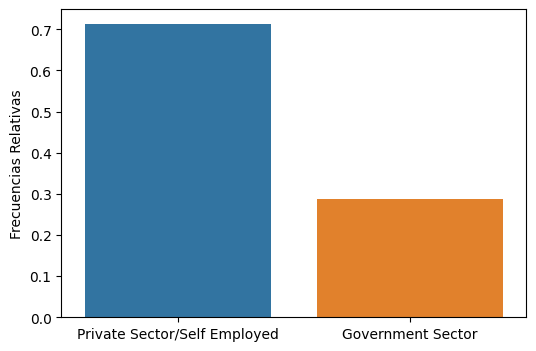

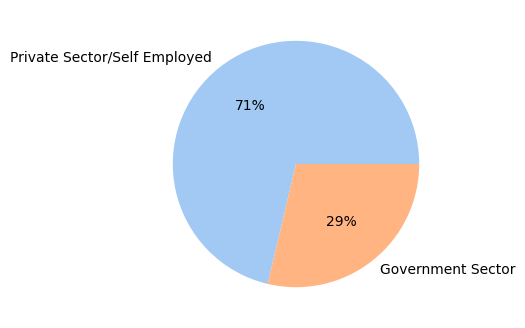

*************************************************
*************************************************
*************************************************
Variable = universitario
*************************************************
     Frecuencias Relativas  Frecuencias Absolutas
Yes               0.851535                   1692
No                0.148465                    295


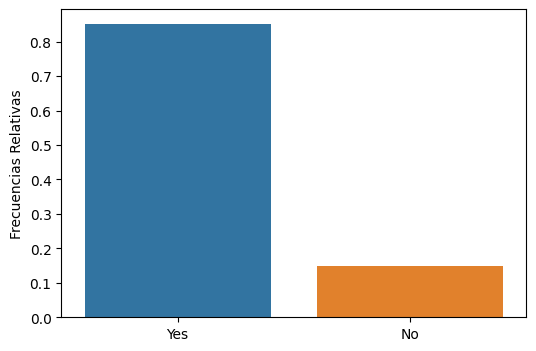

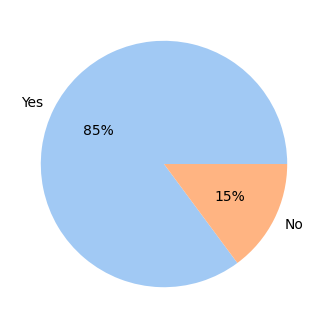

*************************************************
*************************************************
*************************************************
Variable = enfermedad
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
0               0.722194                   1435
1               0.277806                    552


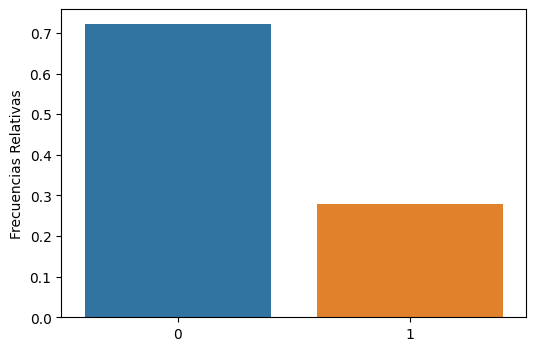

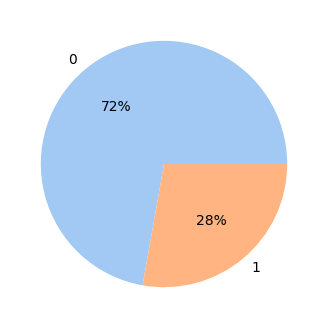

*************************************************
*************************************************
*************************************************
Variable = frecuente
*************************************************
     Frecuencias Relativas  Frecuencias Absolutas
No                0.790136                   1570
Yes               0.209864                    417


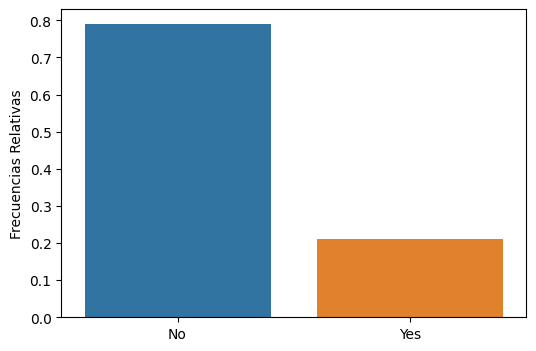

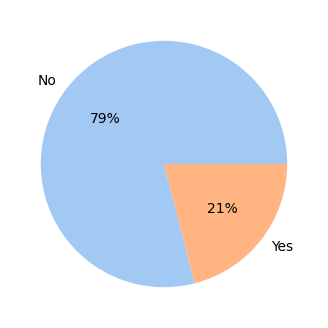

*************************************************
*************************************************
*************************************************
Variable = extranjero
*************************************************
     Frecuencias Relativas  Frecuencias Absolutas
No                0.808757                   1607
Yes               0.191243                    380


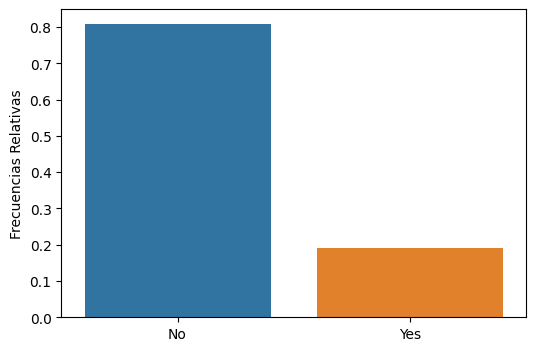

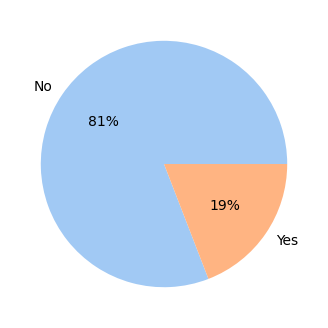

*************************************************
*************************************************


In [87]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# Exploración multivariada

## Separamos variables de entrada y salida

In [88]:
X_tot = data.drop(respuesta[0], axis=1) # variables de entrada TODAS sin la salida

X_cual = data.drop(var_num, axis=1)
X_cual = X_cual.drop(respuesta[0], axis=1) # variables cualitativas sin la salida

X_num = data.drop(var_cual, axis=1)
X_num = X_num.drop(respuesta[0], axis=1) # variables cuantitativas sin la salida

y = data[respuesta[0]] # variable de salida

## Variables cuantitativas vs la salida

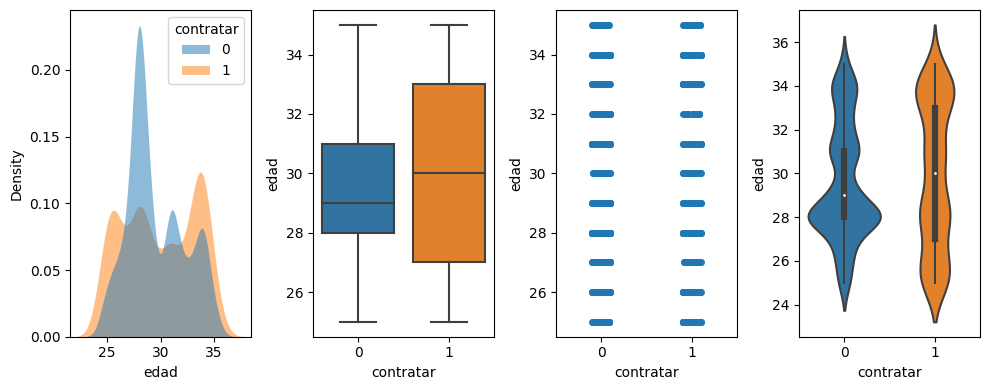

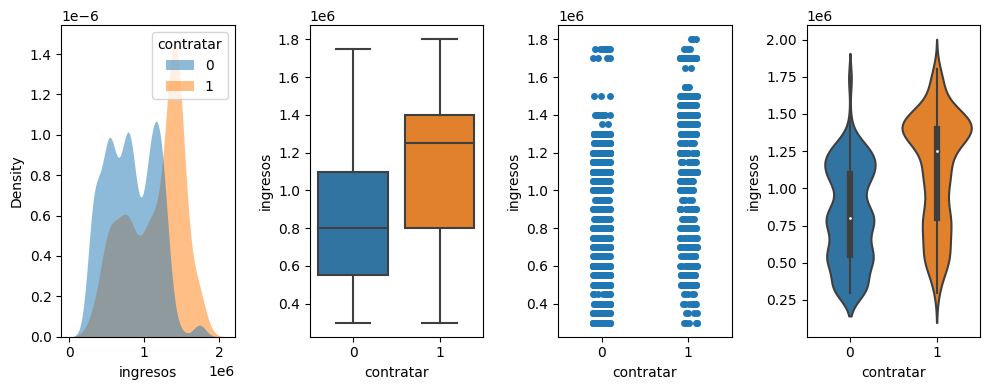

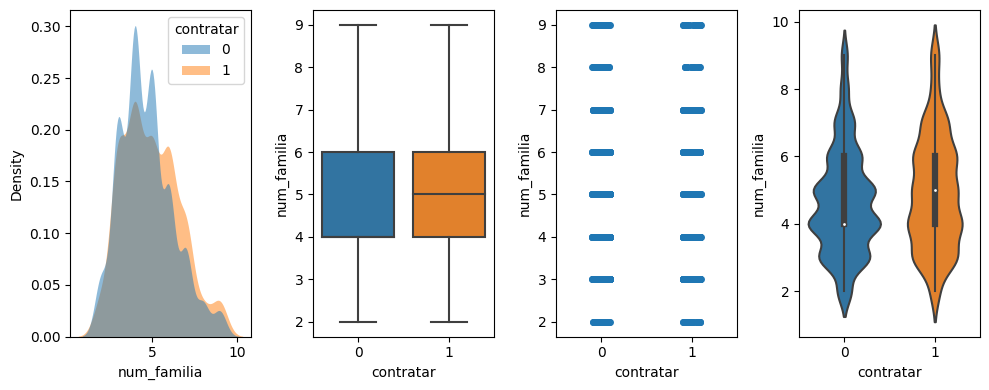

In [89]:
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i, hue=respuesta[0],
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i, x=respuesta[0],ax=axs[1])
    sns.stripplot(y= i,data=data, x =respuesta[0],ax=axs[2])
    sns.violinplot(data=data, y=i, x=respuesta[0],ax=axs[3])
    fig.tight_layout()
    plt.show()

In [90]:
# Estadísticos descriptivos por grupos de la variable de salida:

x = respuesta[0] # selecciona la variable cualitativa o factor
y = var_num

vec_var = np.append(x, y) # vector de las variables

# calcularmos los estadísticos descriptivos:
df1=(data[vec_var].groupby(x)
         .describe()
         .unstack()
         .unstack(1))
df1['se'] = df1['std']/np.sqrt(df1['count'])# error estándar
df1['ic 95 lower'] = df1['mean']-1.96*df1['se']
df1['ic 95 upper'] = df1['mean']+1.96*df1['se']
df1['iqr'] = df1['75%']-df1['25%']
df1

count          mean            std       min  \
            contratar                                                  
edad        0          1277.0  2.951762e+01       2.644396      25.0   
            1           710.0  2.988873e+01       3.331732      25.0   
ingresos    0          1277.0  8.212999e+05  328898.896970  300000.0   
            1           710.0  1.133239e+06  374844.677369  300000.0   
num_familia 0          1277.0  4.657009e+00       1.562634       2.0   
            1           710.0  4.925352e+00       1.678304       2.0   

                            25%        50%        75%        max  \
            contratar                                              
edad        0              28.0       29.0       31.0       35.0   
            1              27.0       30.0       33.0       35.0   
ingresos    0          550000.0   800000.0  1100000.0  1750000.0   
            1          800000.0  1250000.0  1400000.0  1800000.0   
num_familia 0               4.0        4.0        6.0        9.0   
            1               4.0        5.0        6.0        9.0   

                                 se   ic 95 lower   ic 95 upper       iqr  
            contratar                                                      
edad        0              0.074000  2.937258e+01  2.966266e+01       3.0  
            1              0.125038  2.964366e+01  3.013381e+01       6.0  
ingresos    0           9203.795667  8.032605e+05  8.393394e+05  550000.0  
            1          14067.670065  1.105667e+06  1.160812e+06  600000.0  
num_familia 0              0.043728  4.571301e+00  4.742716e+00       2.0  
            1              0.062986  4.801900e+00  5.048804e+00       2.0

## Variables cualitativas vs la salida

Tabla de frecuencias absolutas:
Private Sector/Self Employed    1417
Government Sector                570
Name: tipo_empleo, dtype: int64
Tabla de frecuencias porcentaje:
   contratar                   tipo_empleo   percent
0          0             Government Sector  0.336727
1          0  Private Sector/Self Employed  0.663273
2          1             Government Sector  0.197183
3          1  Private Sector/Self Employed  0.802817


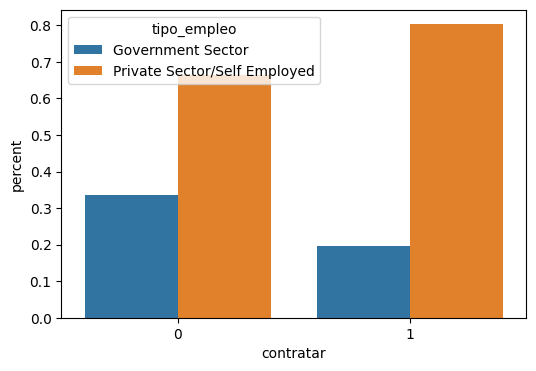

Tabla de frecuencias absolutas:
Yes    1692
No      295
Name: universitario, dtype: int64
Tabla de frecuencias porcentaje:
   contratar universitario   percent
0          0            No  0.153485
1          0           Yes  0.846515
2          1            No  0.139437
3          1           Yes  0.860563


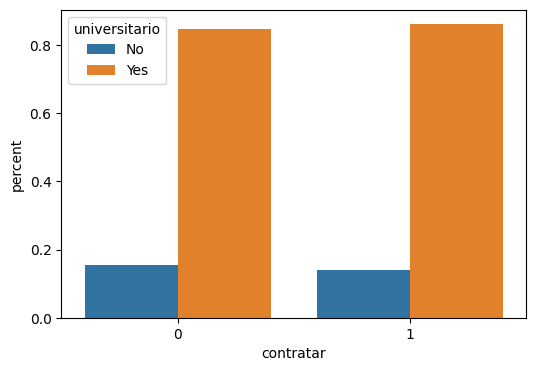

Tabla de frecuencias absolutas:
0    1435
1     552
Name: enfermedad, dtype: int64
Tabla de frecuencias porcentaje:
   contratar  enfermedad   percent
0          0           0  0.728269
1          0           1  0.271731
2          1           0  0.711268
3          1           1  0.288732


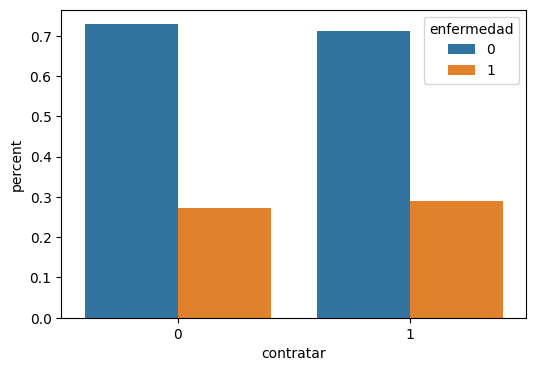

Tabla de frecuencias absolutas:
No     1570
Yes     417
Name: frecuente, dtype: int64
Tabla de frecuencias porcentaje:
   contratar frecuente   percent
0          0        No  0.860611
1          0       Yes  0.139389
2          1        No  0.663380
3          1       Yes  0.336620


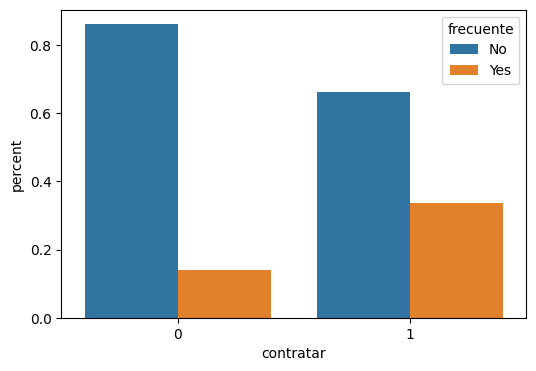

Tabla de frecuencias absolutas:
No     1607
Yes     380
Name: extranjero, dtype: int64
Tabla de frecuencias porcentaje:
   contratar extranjero   percent
0          0         No  0.935787
1          0        Yes  0.064213
2          1         No  0.580282
3          1        Yes  0.419718


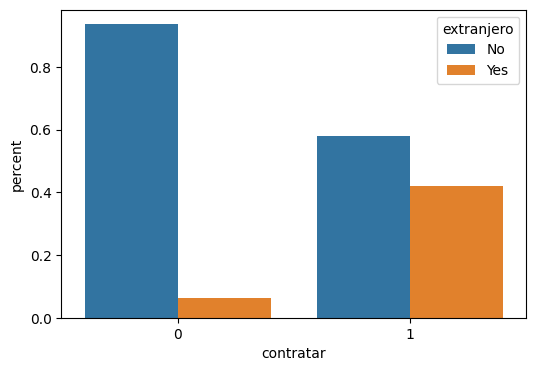

In [91]:
# Ejemplo variables de entrada cualitativas vs salida
# Mostrar graficos y tablas de todas las variables cualitativas
for i in var_cual:
    print('Tabla de frecuencias absolutas:')
    print(data[i].value_counts())
    print('Tabla de frecuencias porcentaje:')
    pct2 = (data.groupby([respuesta[0],i]).size() / data.groupby([respuesta[0]]).size()).reset_index().rename({0:'percent'}, axis=1)
    print(pct2)
    sns.barplot(x=respuesta[0], hue=i, y='percent', data=pct2)
    plt.show()

# Selección de datos de entrada y de salida

In [92]:
X_tot = data.copy()
X_tot.head(8)

,edad,tipo_empleo,universitario,ingresos,num_familia,enfermedad,frecuente,extranjero,contratar
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1


In [93]:
X_tot.dtypes

edad              int64
tipo_empleo      object
universitario    object
ingresos          int64
num_familia       int64
enfermedad       object
frecuente        object
extranjero       object
contratar        object
dtype: object

In [94]:
# Hay que convertir todas las variables de entrada a CUANTITATIVAS, es decir los valores object a int

# convertir los valores de tipo_empleo
X_tot.tipo_empleo = X_tot.tipo_empleo.replace({"Government Sector": 0,
                                               "Private Sector/Self Employed": 1                            
                                              })
# convertir los valores de universitario
X_tot.universitario = X_tot.universitario.replace({"No": 0,
                                               "Yes": 1                            
                                              })

# convertir "enfermedad" en int
X_tot['enfermedad'] = X_tot['enfermedad'].astype('int64')

# convertir los valores de frecuente
X_tot.frecuente = X_tot.frecuente.replace({"No": 0,
                                               "Yes": 1                            
                                              })
# convertir los valores de extranjero
X_tot.extranjero = X_tot.extranjero.replace({"No": 0,
                                               "Yes": 1                            
                                              })

# convertir "contratar" en int
X_tot['contratar'] = X_tot['contratar'].astype('int64')

# mostrar el dataframe, ya convertido
X_tot.head(8)

,edad,tipo_empleo,universitario,ingresos,num_familia,enfermedad,frecuente,extranjero,contratar
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
5,25,1,0,1150000,4,0,0,0,0
6,31,0,1,1300000,4,0,0,0,0
7,31,1,1,1350000,3,0,1,1,1


In [95]:
X_tot.dtypes

edad             int64
tipo_empleo      int64
universitario    int64
ingresos         int64
num_familia      int64
enfermedad       int64
frecuente        int64
extranjero       int64
contratar        int64
dtype: object

# Feature selection - selección variables

## Filtro univariado - comparación de medias o medianas

Tenemos dos opciones:

    .- Comparar medias: ANOVA
    .- Comparar medianas: Kruskal Wallis

*********************************************
edad vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source            SS    DF         MS         F     p-unc       np2
0  contratar     62.843976     1  62.843976  7.428382  0.006477  0.003728
1     Within  16793.063422  1985   8.459982       NaN       NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1         H     p-unc
Kruskal  contratar      1  4.671026  0.030676


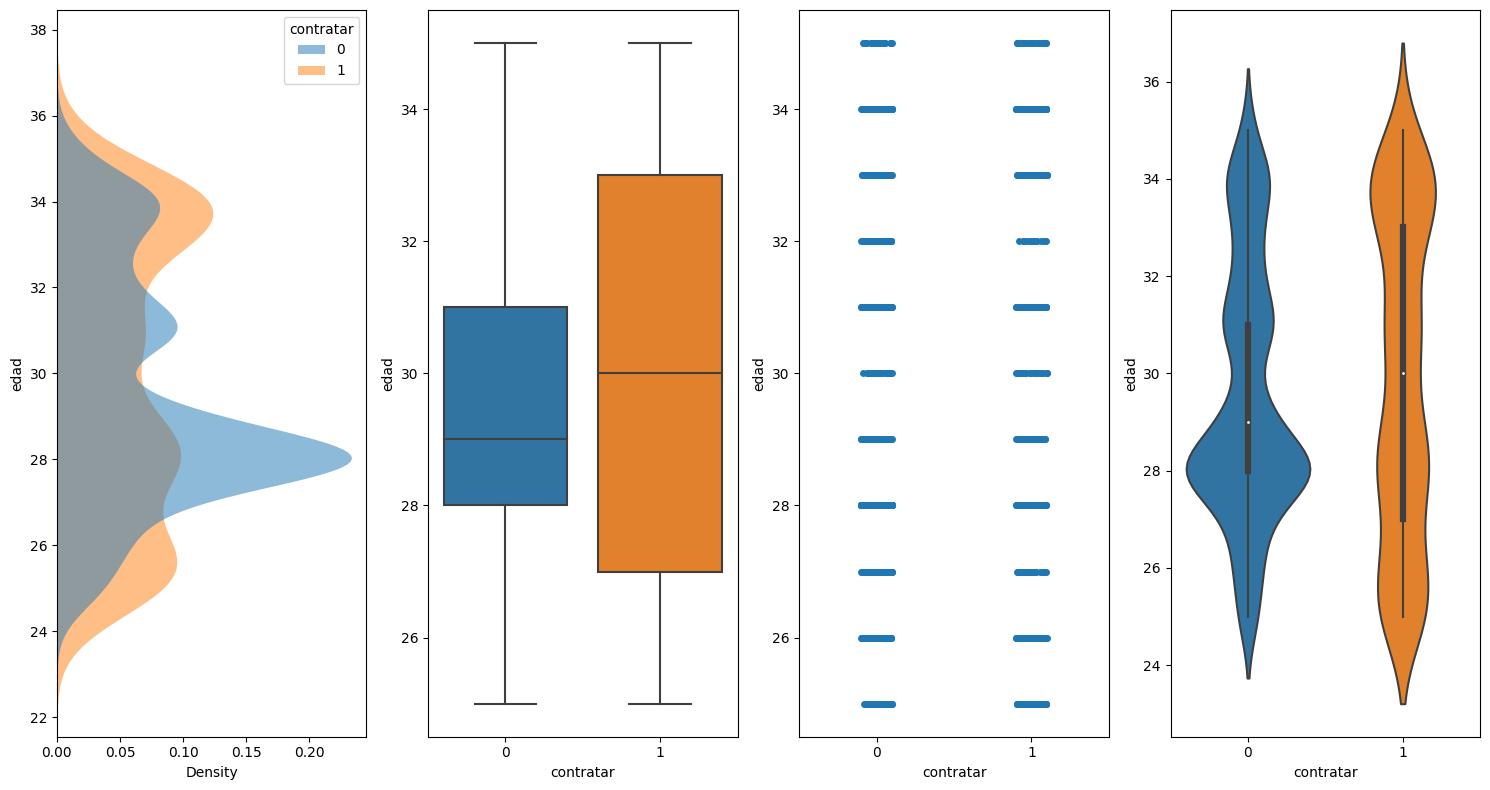

*********************************************
tipo_empleo vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source          SS    DF        MS          F         p-unc       np2
0  contratar    8.885283     1  8.885283  44.359162  3.527704e-11  0.021859
1     Within  397.601884  1985  0.200303        NaN           NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1          H         p-unc
Kruskal  contratar      1  43.411387  4.435993e-11


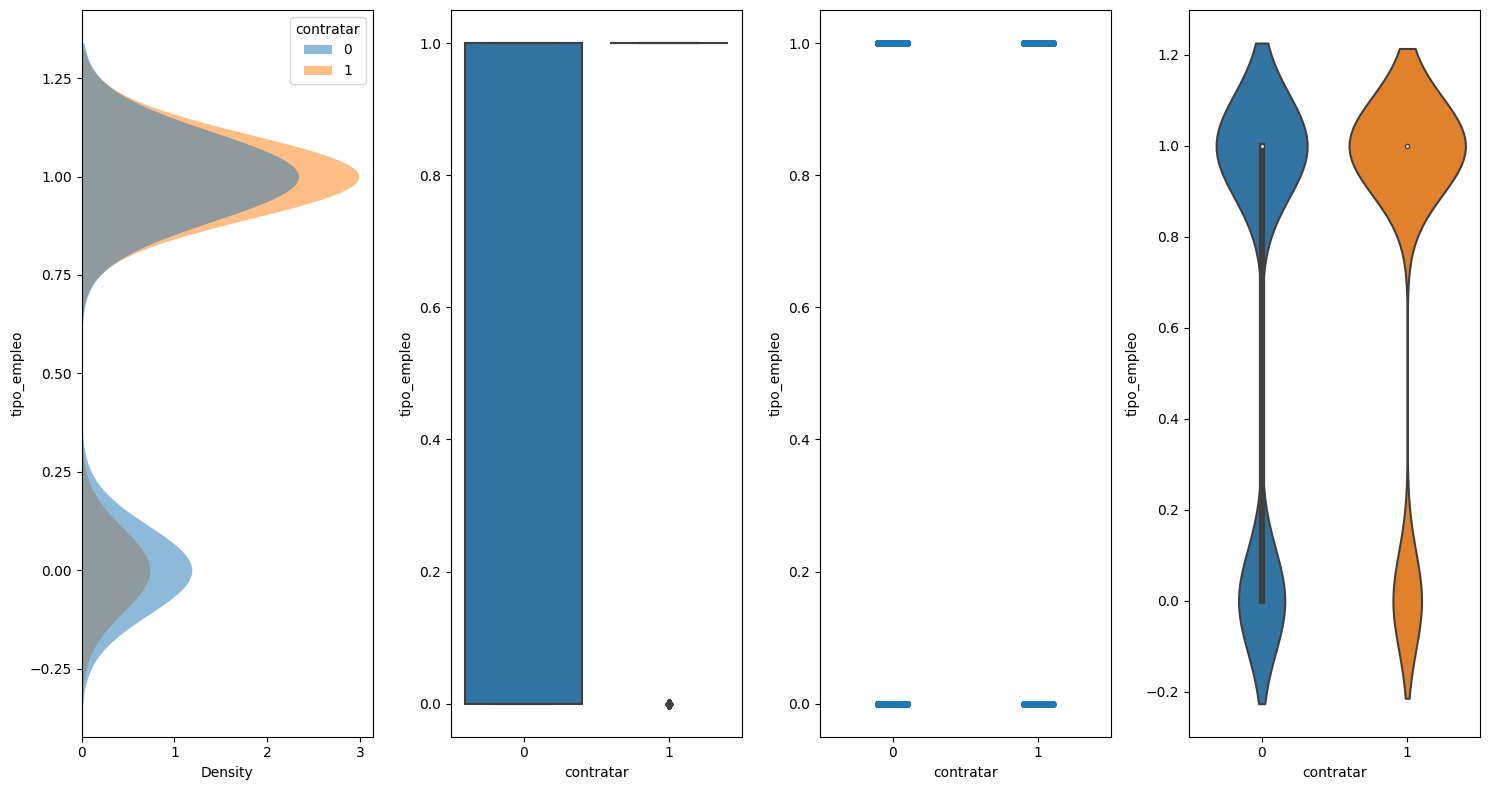

*********************************************
universitario vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source          SS    DF        MS         F     p-unc       np2
0  contratar    0.090051     1  0.090051  0.711834  0.398937  0.000358
1     Within  251.112768  1985  0.126505       NaN       NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1         H     p-unc
Kruskal  contratar      1  0.711938  0.398801


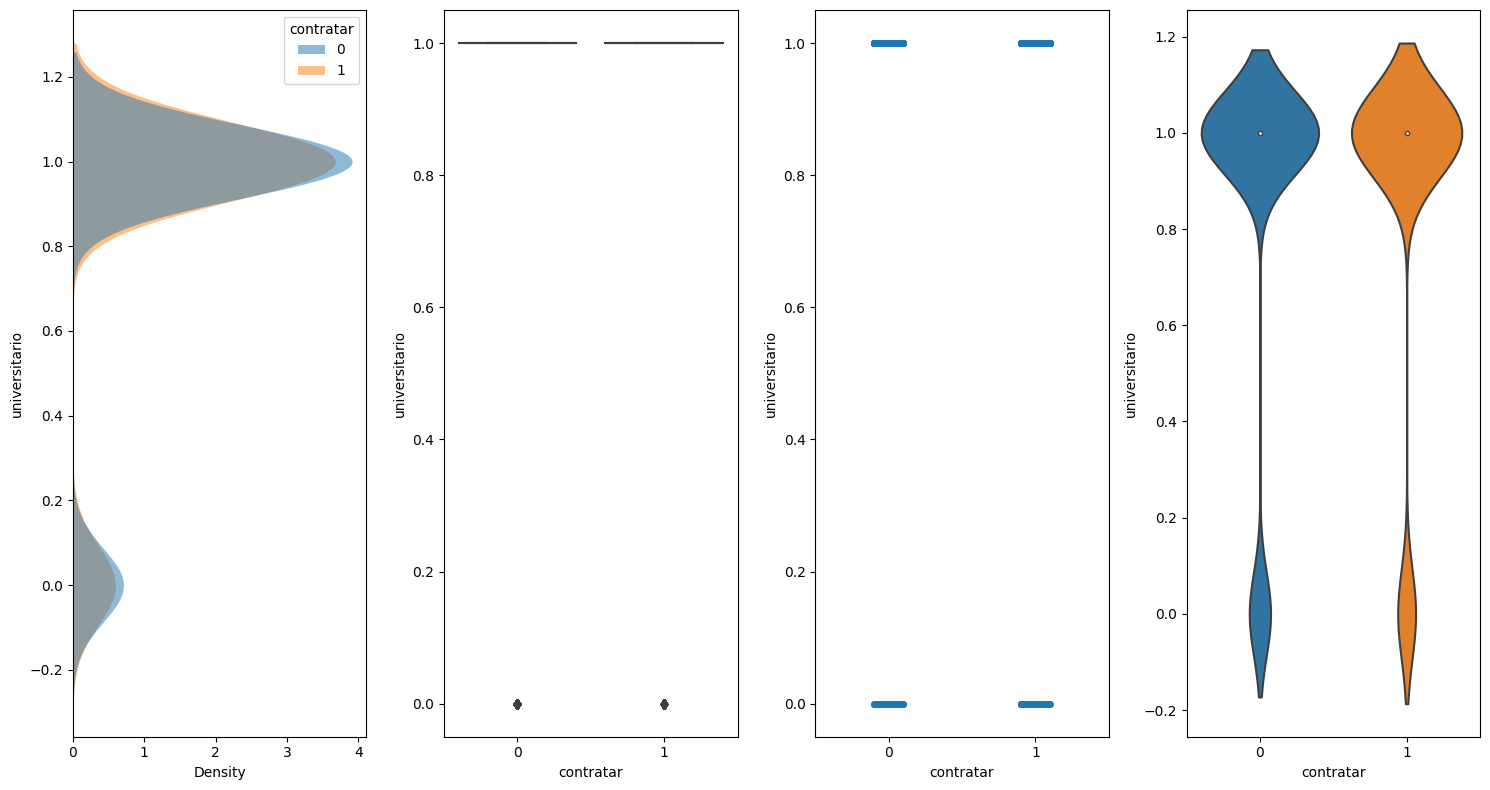

*********************************************
ingresos vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source            SS    DF            MS           F         p-unc  \
0  contratar  4.440094e+13     1  4.440094e+13  370.862293  6.635018e-76   
1     Within  2.376512e+14  1985  1.197235e+11         NaN           NaN   

        np2  
0  0.157421  
1       NaN  
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1           H         p-unc
Kruskal  contratar      1  313.945661  3.017909e-70


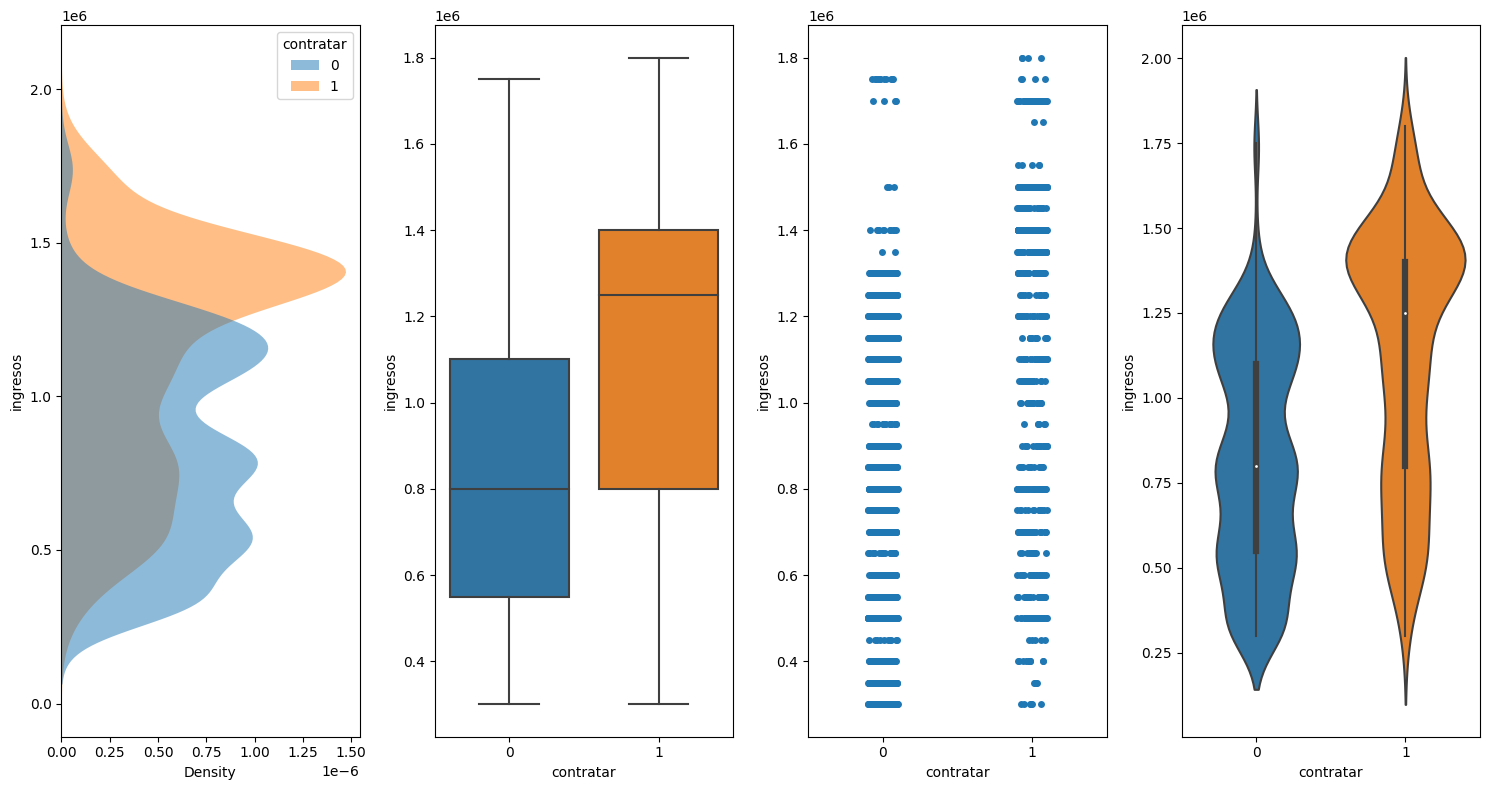

*********************************************
num_familia vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source           SS    DF         MS          F     p-unc       np2
0  contratar    32.857426     1  32.857426  12.756575  0.000363  0.006385
1     Within  5112.813435  1985   2.575725        NaN       NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1         H    p-unc
Kruskal  contratar      1  11.17275  0.00083


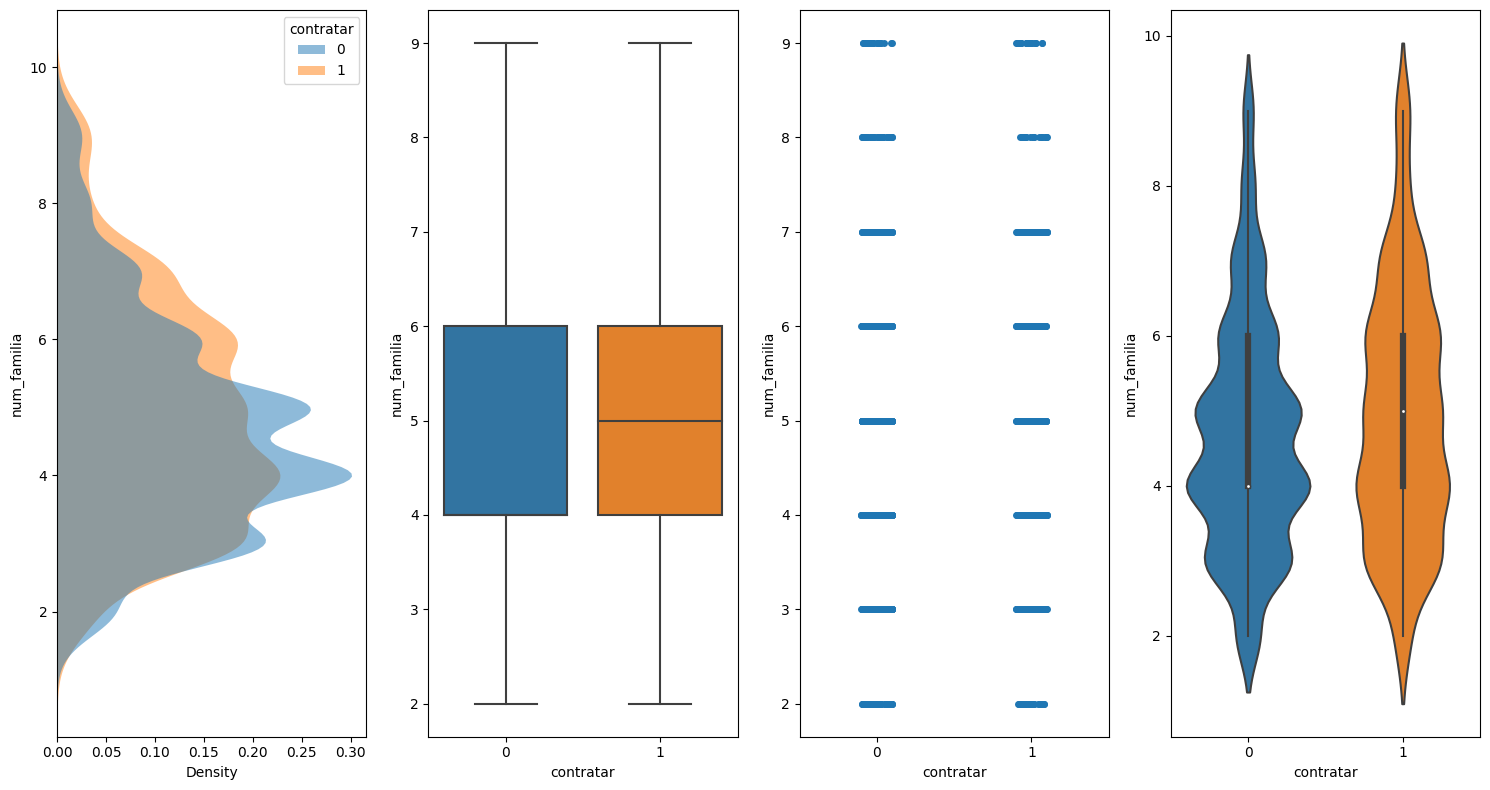

*********************************************
enfermedad vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source          SS    DF        MS         F     p-unc       np2
0  contratar    0.131899     1  0.131899  0.656978  0.417726  0.000331
1     Within  398.519334  1985  0.200765       NaN       NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1         H     p-unc
Kruskal  contratar      1  0.657092  0.417589


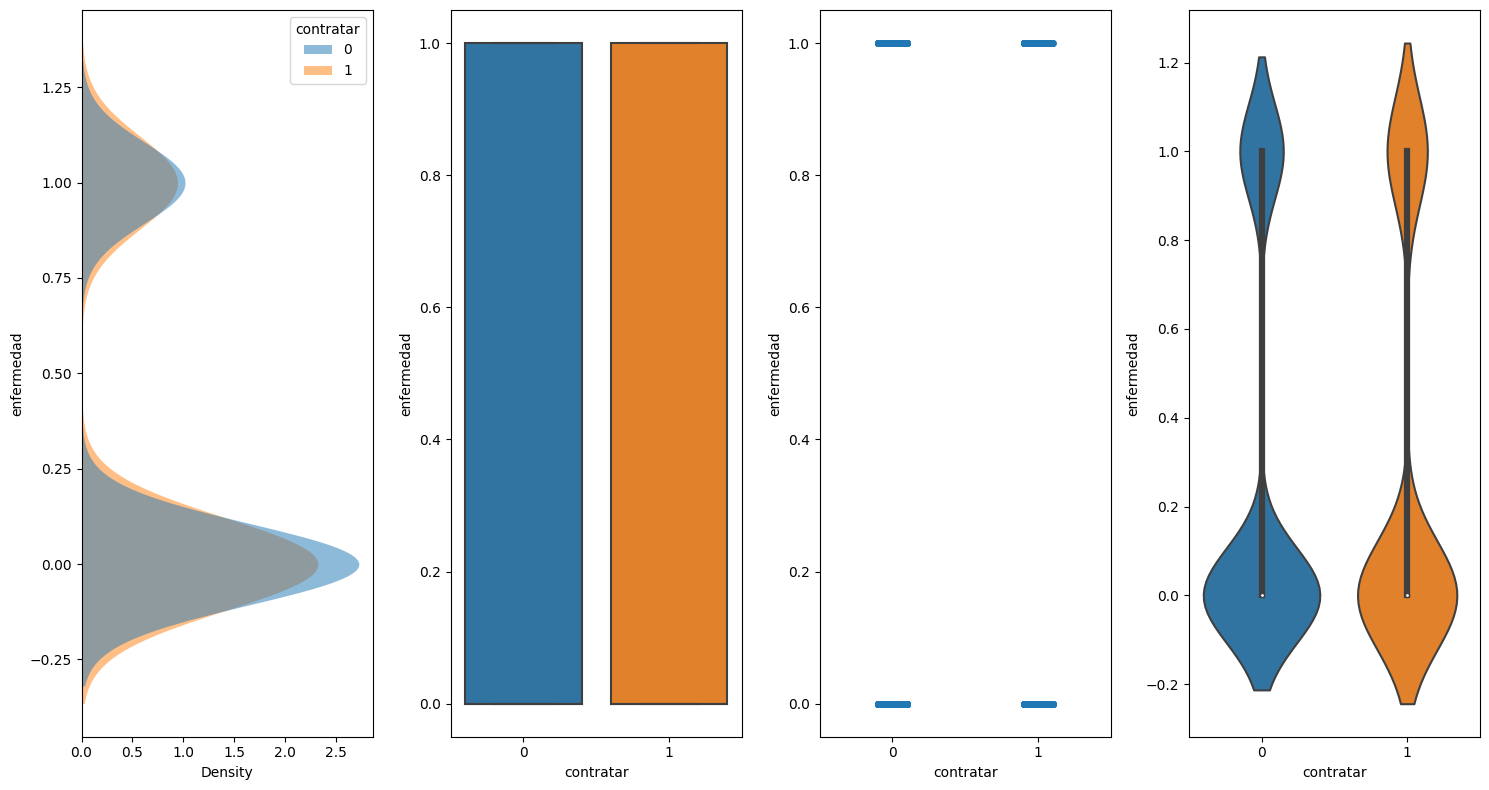

*********************************************
frecuente vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source          SS    DF         MS           F         p-unc       np2
0  contratar   17.750052     1  17.750052  113.024434  1.032551e-25  0.053872
1     Within  311.736611  1985   0.157046         NaN           NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1           H         p-unc
Kruskal  contratar      1  106.989472  4.475406e-25


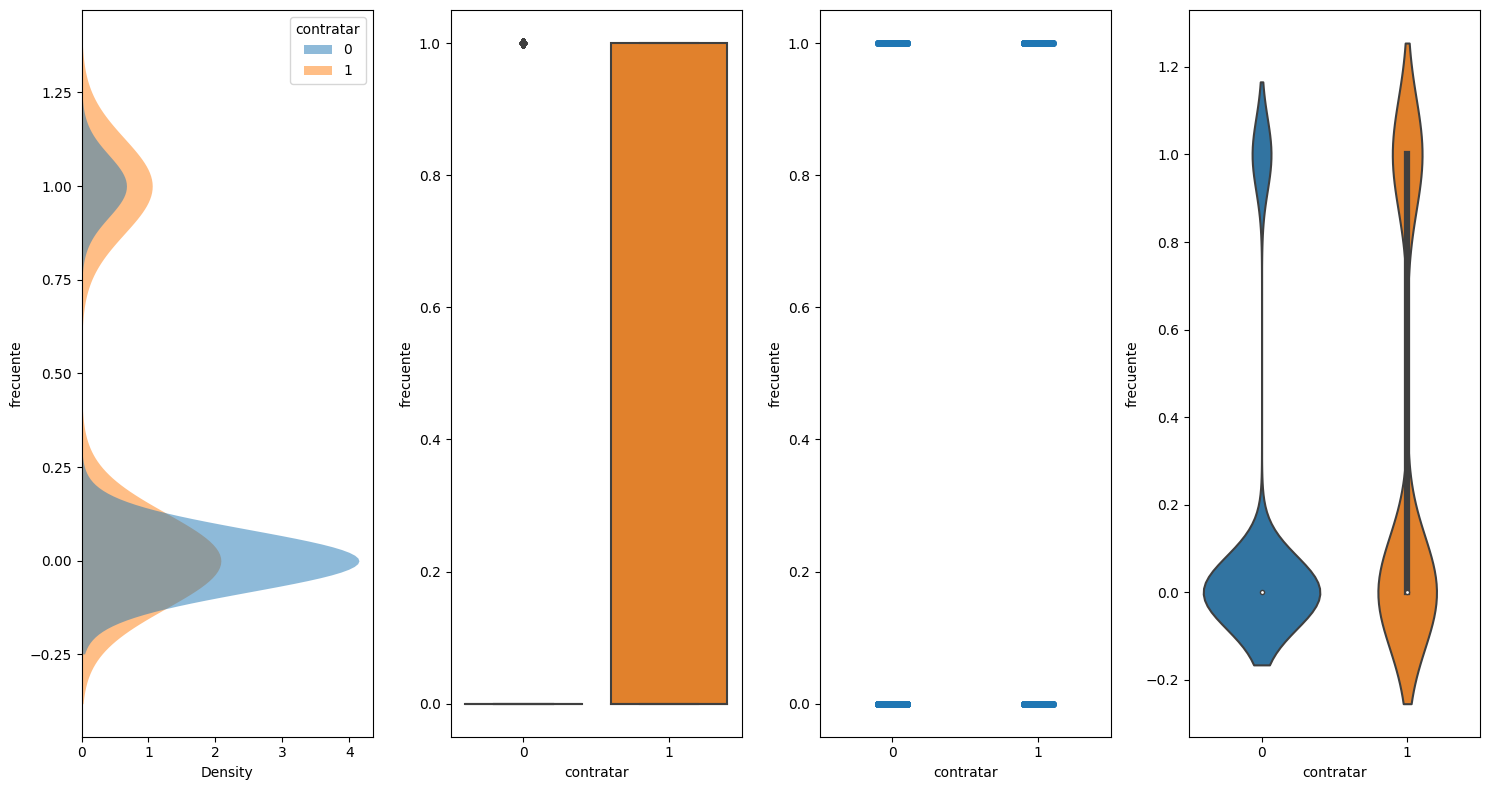

*********************************************
extranjero vs grupos de contratar
*********************************************
______
ANOVA
⎺⎺⎺⎺⎺⎺
      Source          SS    DF         MS           F         p-unc       np2
0  contratar   57.669152     1  57.669152  458.519444  1.088979e-91  0.187647
1     Within  249.658478  1985   0.125773         NaN           NaN       NaN
_________________
KRUSKALL WALLIS
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
            Source  ddof1           H         p-unc
Kruskal  contratar      1  372.667227  4.914299e-83


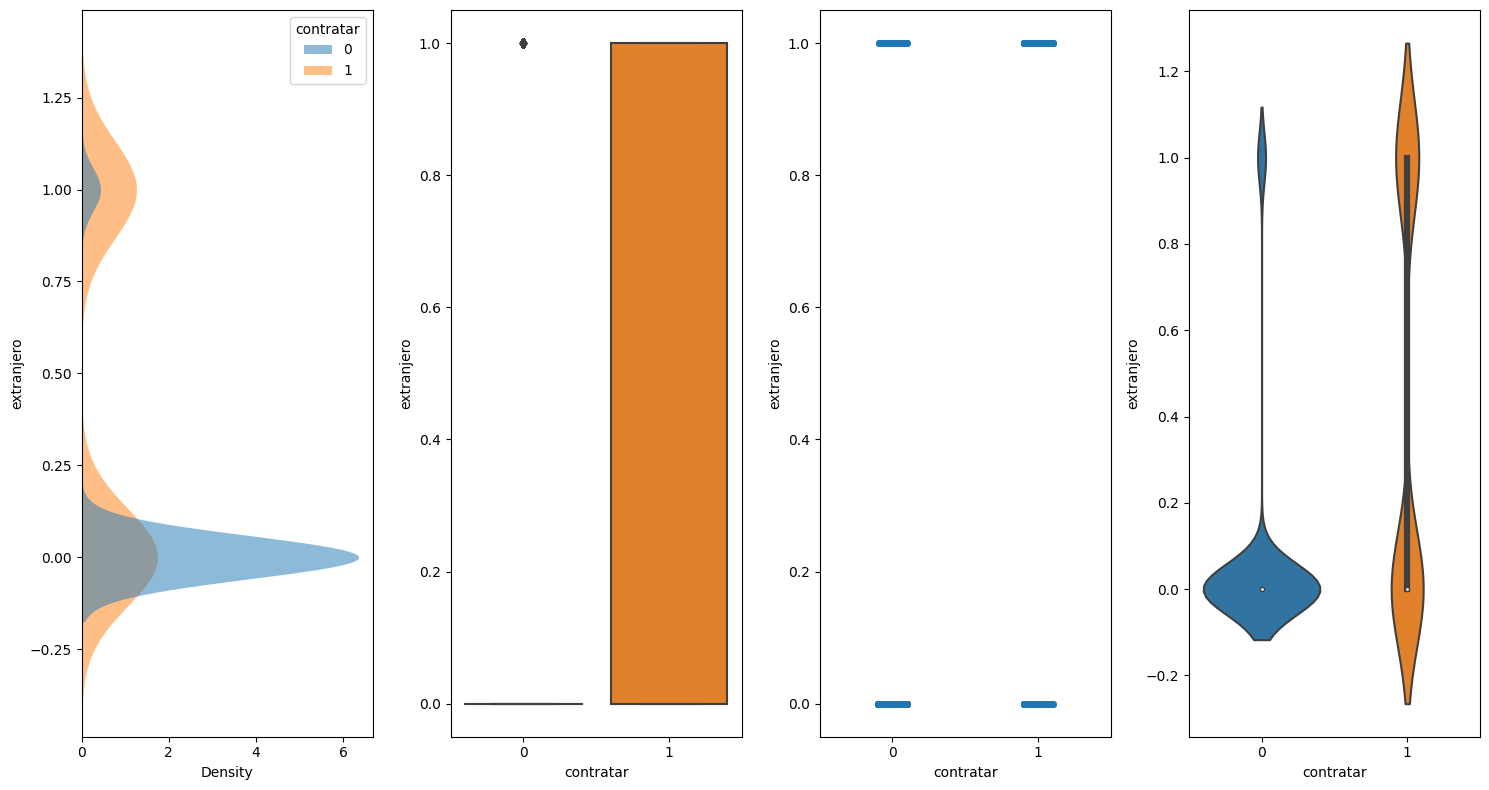

In [96]:
# Cálculo de la ANOVA y Kruskall Wallis:

var_y = 'contratar' # variable cualitativa fija (respuesta)
# obtener las variables INT excepto la respuesta
xx = data.drop(respuesta[0], axis=1)
vec_var_num = xx.columns

anova_df = pd.DataFrame(columns=['Variable', 'ANOVA p-value', 'Kruskall Wallis p-value'])

for i in vec_var_num:
    
    print("*********************************************")
    print(i + " vs grupos de " + var_y)
    print("*********************************************")
    print("______")
    print("ANOVA")
    print("⎺⎺⎺⎺⎺⎺")
    # Calcular la ANOVA para i vs var_y
    aov = pg.anova(dv=i, between=var_y, data=X_tot,
                   detailed=True)
    print(aov)
    print("_________________")
    print("KRUSKALL WALLIS")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")    
    # Calcular Kruskall Wallis para i vs var_y
    kruskal = pg.kruskal(dv=i, between=var_y, data=X_tot)
    print(kruskal)
    
    # Copiamos los p-valores que calculamos en el data frame:
    anova_df.loc[len(anova_df)]=[i,aov['p-unc'][0],kruskal['p-unc'][0]]
    
    
    # Gráfico de comparación de medias:
    y = var_y
    x = i
    
    fig, axs = plt.subplots(ncols=4, figsize=(15, 8))
    sns.kdeplot(
        data=X_tot, y=x, hue=y,
        fill=True, common_norm=False,
        alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=X_tot, y=x, x=y,ax=axs[1])
    sns.stripplot(y= x,data=X_tot, x =y,ax=axs[2])
    sns.violinplot(data=X_tot, y=x, x=y,ax=axs[3])
    fig.tight_layout()
    plt.show()

In [97]:
# ordenar el data frame de menos a mayor p-value:
anova_df = anova_df.sort_values(by='ANOVA p-value')
anova_df

,Variable,ANOVA p-value,Kruskall Wallis p-value
7,extranjero,1.088979e-91,4.914299e-83
3,ingresos,6.635018e-76,3.017909e-70
6,frecuente,1.032551e-25,4.475406e-25
1,tipo_empleo,3.527704e-11,4.435993e-11
4,num_familia,3.632080e-04,8.300750e-04
0,edad,6.476684e-03,3.067559e-02
2,universitario,3.989372e-01,3.988013e-01
5,enfermedad,4.177259e-01,4.175885e-01


En todos las variables existe significación tanto en ANOVA como en Kruskall Wallis, excepto para las variables <b>universitario</b> y <b>enfermedad</b>.

### Mutual Information

In [98]:
# variables de entrada
X_ = X_tot.drop(respuesta[0], axis=1)
# variables de salida
y_ = X_tot[respuesta[0]] 

In [99]:
#Calcular el MI de las variables
#from sklearn.feature_selection import mutual_info_classif
a = mutual_info_classif(X_, y_)
b = X_.columns
mutualinfo = pd.DataFrame(a,b,columns =["Mutual_Information"])
mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)

,Mutual_Information
extranjero,0.095674
ingresos,0.092100
edad,0.052270
frecuente,0.019557
tipo_empleo,0.013066
universitario,0.010308
enfermedad,0.003783
num_familia,0.000000


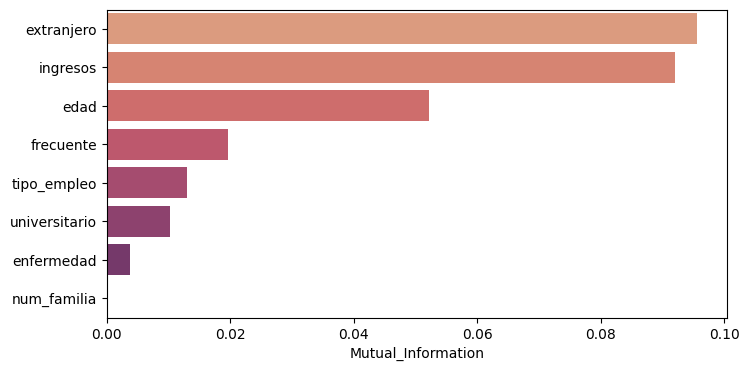

In [100]:
# Plot de la mutual information
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],
            y = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).index,
            palette ="flare",
            data=mutualinfo)
plt.show()

En todos las variables existe significación para el MI, excepto para las variables <b>universitario</b> y <b>enfermedad</b>.

### Filtro univariado - asociar proporciones

In [101]:
# variable de salida
x = respuesta[0]
x

'contratar'

In [102]:
# variables cualitativas
vec_y = var_cual
vec_y

Index(['tipo_empleo', 'universitario', 'enfermedad', 'frecuente',
       'extranjero'],
      dtype='object')

**************************************
tipo_empleo vs contratar
**************************************
_________________
Valores esperados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar                             0          1
tipo_empleo                                       
Government Sector             366.32612  203.67388
Private Sector/Self Employed  910.67388  506.32612
_________________
Valores observados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar                         0      1
tipo_empleo                               
Government Sector             429.5  140.5
Private Sector/Self Employed  847.5  569.5
_________________
Chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
                 test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  42.753803  1.0  6.208107e-11  0.146686   
1        cressie-read  0.666667  43.243174  1.0  4.834213e-11  0.147523   
2      log-likelihood  0.000000  44.386920  1.0  2.694816e-11  0.149461   
3       freeman-tukey -0.500000  45.402681  1.0  1.604146e-

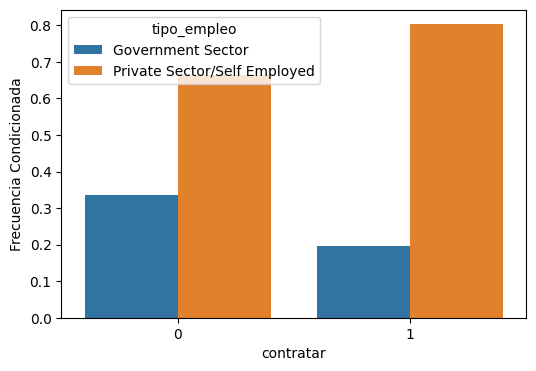

**************************************
**************************************
**************************************
universitario vs contratar
**************************************
_________________
Valores esperados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar                0           1
universitario                         
No              189.589834  105.410166
Yes            1087.410166  604.589834
_________________
Valores observados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar           0      1
universitario               
No              195.5   99.5
Yes            1081.5  610.5
_________________
Chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.605510  1.0  0.436483  0.017457  0.121728
1        cressie-read  0.666667  0.606939  1.0  0.435943  0.017477  0.121902
2      log-likelihood  0.000000  0.609869  1.0  0.434837  0.017519  0.122258
3       freeman-tukey -0.500000  0.612129  1.0  0.433987  0.017552  0.12253

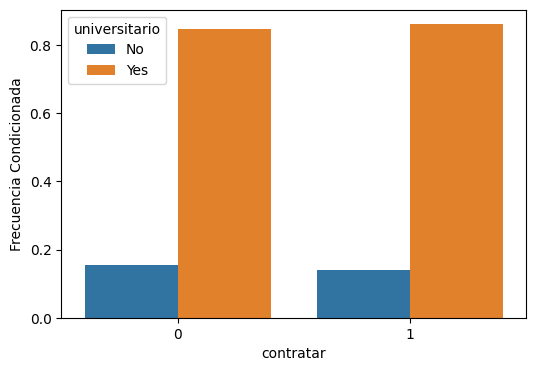

**************************************
**************************************
**************************************
enfermedad vs contratar
**************************************
_________________
Valores esperados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar            0           1
enfermedad                        
0           922.242073  512.757927
1           354.757927  197.242073
_________________
Valores observados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar       0      1
enfermedad              
0           929.5  505.5
1           347.5  204.5
_________________
Chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.575411  1.0  0.448117  0.017017  0.118076
1        cressie-read  0.666667  0.574785  1.0  0.448364  0.017008  0.118000
2      log-likelihood  0.000000  0.573557  1.0  0.448849  0.016990  0.117851
3       freeman-tukey -0.500000  0.572657  1.0  0.449205  0.016977  0.117742
4  mod-log-likelihood -1.000000  

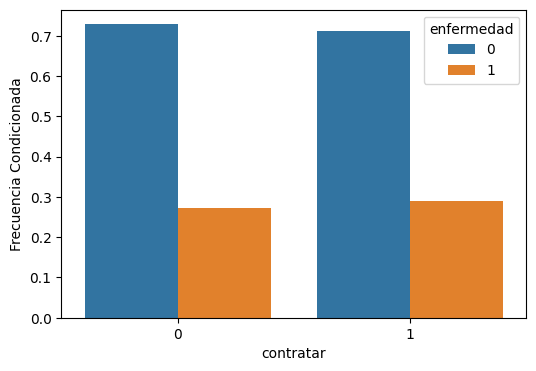

**************************************
**************************************
**************************************
frecuente vs contratar
**************************************
_________________
Valores esperados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar            0           1
frecuente                         
No         1009.003523  560.996477
Yes         267.996477  149.003523
_________________
Valores observados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar       0      1
frecuente               
No         1098.5  471.5
Yes         178.5  238.5
_________________
Chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
                 test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  105.857231  1.0  7.924360e-25  0.230814   
1        cressie-read  0.666667  104.283783  1.0  1.753181e-24  0.229092   
2      log-likelihood  0.000000  102.118077  1.0  5.230903e-24  0.226700   
3       freeman-tukey -0.500000  101.300293  1.0  7.904408e-24  0.225791   
4  mod-log-likelihood -1.000000  101.13

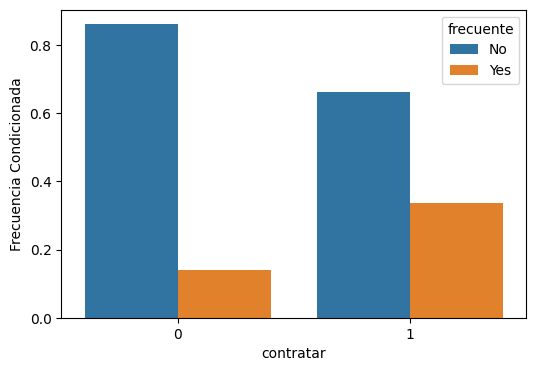

**************************************
**************************************
**************************************
extranjero vs contratar
**************************************
_________________
Valores esperados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar             0           1
extranjero                         
No          1032.782587  574.217413
Yes          244.217413  135.782587
_________________
Valores observados
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
contratar        0      1
extranjero               
No          1194.5  412.5
Yes           82.5  297.5
_________________
Chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺
                 test    lambda        chi2  dof           pval    cramer  \
0             pearson  1.000000  370.559928  1.0   1.413451e-82  0.431847   
1        cressie-read  0.666667  363.404749  1.0   5.107628e-81  0.427658   
2      log-likelihood  0.000000  362.269138  1.0   9.025887e-81  0.426989   
3       freeman-tukey -0.500000  373.450433  1.0   3.318465e-83  0.433528   
4  mod-log-likelihood -1.

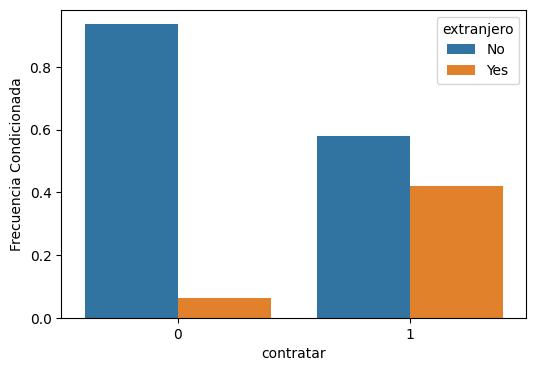

**************************************
**************************************


In [103]:
# Diagramas de barras de dos factores de frecuencias condicionadas a los grupos de la variable x

#crear un df con las 3 columnas a evaluar
chi2_df = pd.DataFrame(columns=['Variable', 'Chi2 Pearson p-value', 'Chi 2 log-likelihood p-value'])


for i in vec_y:

    y = i
    print('**************************************')
    print(y + ' vs ' + x)
    print('**************************************')
    
    # Chi Cuadrado:
    chi2_res = pg.chi2_independence(data, x=y,y=x)
    print("_________________")
    print("Valores esperados")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
    print(chi2_res[0])
    print("_________________")
    print("Valores observados")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
    print(chi2_res[1])
    print("_________________")
    print("Chi cuadrado:")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
    print(chi2_res[2])
    print("_________________________")
    print("Frecuencias condicionadas:")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
    # Tabla de frecuencias condicionadas:
    pct2 = (data.groupby([x,y]).size() / data.groupby([x]).size()).reset_index().rename({0:'Frecuencia Condicionada'}, axis=1)
    print(pct2)
    print("_________________")
    print("Diagrama barras:")
    print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
    # Gráfico de barras de las frecuencias condicionadas:
    sns.barplot(x=x, hue=y, y='Frecuencia Condicionada', data=pct2)
    plt.show()
    print('**************************************')
    print('**************************************')
    
    # Guardamos los valores de chi cuadrado:
    # Copiamos los p-valores que calculamos en el data frame:
    chi2_df.loc[len(chi2_df)]=[i,chi2_res[2]["pval"][0],chi2_res[2]["pval"][2]]

In [104]:
print("_______________________________________________")
print("Resumen de todos los test de chi cuadrado:")
print("⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺")
# ordenar el data frame de menos a mayor p-value:
chi2_df = chi2_df.sort_values(by='Chi2 Pearson p-value')
chi2_df

_______________________________________________
Resumen de todos los test de chi cuadrado:
⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺⎺


,Variable,Chi2 Pearson p-value,Chi 2 log-likelihood p-value
4,extranjero,1.413451e-82,9.025887e-81
3,frecuente,7.924360e-25,5.230903e-24
0,tipo_empleo,6.208107e-11,2.694816e-11
1,universitario,4.364834e-01,4.348372e-01
2,enfermedad,4.481165e-01,4.488490e-01


Las únicas variables que <b>NO</b> son significativas son <b>universitario</b> y <b>enfermedad</b>. 

Estas dos las podríamos quitar del algoritmo ya que no encontramos ningún patrón.

Las demás si que presentan patrones o algo que decir con las variable de salida.

Teniendo en cuenta que la variable <b>extranjero</b> es la que tiene más importancia.

## Filtro multivariado: mejor modelo logístico según el BIC

Primero calculamos un modelo logístico solo aplicable cuando tienes un problema binario. 

A veces el modelo logístico puede ser inestable porque tenemos pocos datos o porque simplemento con las variables de entrada no podemos calcular un modelo logístico robusto.

Un primer paso opcional es calcular el modelo logístico con TODAS las variables o esas que has selecciondo en el filtro univariado.

In [105]:
# modelo logístico inicial con el paquete sklearn
# from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_,y_)
print("Accuracy del modelo:")
clf.score(X_, y_)

Accuracy del modelo:


0.6426774031202819

In [106]:
# Modelo logistico con stats model:
# import statsmodels.api as sm

logit_model = sm.Logit(y_, sm.add_constant(X_)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.520462
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              contratar   No. Observations:                 1987
Model:                          Logit   Df Residuals:                     1978
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.2016
Time:                        15:13:49   Log-Likelihood:                -1034.2
converged:                       True   LL-Null:                       -1295.3
Covariance Type:            nonrobust   LLR p-value:                1.219e-107
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.4047      0.634     -8.525      0.000      -6.647      -4.162
edad              0.0733      0.019      3.958      0.000       0.037       0.110
tipo_empleo       0.0986      0.133      0.743      0.457      -0.161       0.358
universitario    -0.1813      0.156     -1.160      0.246      -0.488       0.125
ingresos       1.565e-06   1.77e-07      8.844      0.000    1.22e-06    1.91e-06
num_familia       0.1529      0.034      4.551      0.000       0.087       0.219
enfermedad        0.0900      0.121      0.743      0.457      -0.147       0.327
frecuente         0.4595      0.137      3.366      0.001       0.192       0.727
extranjero        1.7176      0.153     11.211      0.000       1.417       2.018
=================================================================================
"""

In [107]:
# Calculo del BIC
logit_model.bic

2136.663874317579

El siguiente paso es calcular el modelo logístico cogiendo esas variables según el BIC.

En este caso estamos aplicando un RFE (Recursive Feature elimination) para seleccionar las variables óptimas de cada iteración.

In [108]:
RFE

sklearn.feature_selection._rfe.RFE

In [109]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
BIC_models = pd.DataFrame(0, index=range(len(X_.columns)-1), columns = ["Num_Variables","BIC"])
logreg = LogisticRegression()


# Calculo del BIC con la iteracion i-esima
for i in np.arange(1,len(X_.columns),1):
    # Aplicar el RFE con i-variables
    #rfe = RFE(logreg, i)
    rfe = RFE(logreg, n_features_to_select=i)
    rfe = rfe.fit(X_,y_)
    print(rfe.support_)
    print(rfe.ranking_)

    # Seleccionar las variables de entrada
    X_RFE = X_[X_.columns[rfe.support_]]
    X_RFE.head()

    # Calcular el modelo logistico con las variables seleccionadas
    logit_model_i = sm.Logit(y_, sm.add_constant(X_RFE)).fit()
    logit_model_i.summary()

    # Calcular el BIC del modelo logistico
    BIC_models.iloc[(i-1)] = [i,logit_model_i.bic]

[False False False  True False False False False]
[2 6 4 1 3 8 7 5]
Optimization terminated successfully.
         Current function value: 0.568583
         Iterations 6
[ True False False  True False False False False]
[1 5 3 1 2 7 6 4]
Optimization terminated successfully.
         Current function value: 0.565423
         Iterations 6
[ True False False  True  True False False False]
[1 4 2 1 1 6 5 3]
Optimization terminated successfully.
         Current function value: 0.561204
         Iterations 6
[ True False  True  True  True False False False]
[1 3 1 1 1 5 4 2]
Optimization terminated successfully.
         Current function value: 0.560785
         Iterations 6
[ True False  True  True  True False False  True]
[1 2 1 1 1 4 3 1]
Optimization terminated successfully.
         Current function value: 0.523505
         Iterations 6
[ True  True  True  True  True False False  True]
[1 1 1 1 1 3 2 1]
Optimization terminated successfully.
         Current function value: 0.523358
  

In [110]:
# BIC de todos los modelos, ordenados por el menor BIC, ya que es el mejor modelo
BIC_models.sort_values(by=['BIC'], ascending=True)

,Num_Variables,BIC
4,5,2125.973762
6,7,2129.619845
5,6,2132.986827
2,3,2260.603896
3,4,2266.531160
1,2,2269.772651
0,1,2274.738350


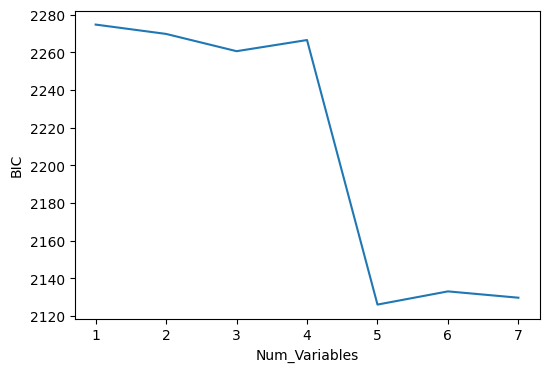

In [111]:
sns.lineplot(data=BIC_models, x="Num_Variables", y="BIC")
plt.show()

In [112]:
# Numero de variables optimo:
n_variables = BIC_models["BIC"].idxmin()+1
print("Numero de variables óptimo es de: ", n_variables)

Numero de variables óptimo es de:  5


In [113]:
# Calculamos el modelo con el RFE con el numero de variables seleccionadas
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select = n_variables)

rfe = rfe.fit(X_,y_)

In [114]:
# Seleccionar las variables de entrada del modelo de RFE
X_RFE = X_[X_.columns[rfe.support_]]
X_RFE.head()

,edad,universitario,ingresos,num_familia,extranjero
0,31,1,400000,6,0
1,31,1,1250000,7,0
2,34,1,500000,4,0
3,28,1,700000,3,0
4,28,1,700000,8,0


In [115]:
# Calculo del modelo con las variables seleccionadas
logit_model_i = sm.Logit(y_, sm.add_constant(X_RFE)).fit()
logit_model_i.summary()

Optimization terminated successfully.
         Current function value: 0.523505
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              contratar   No. Observations:                 1987
Model:                          Logit   Df Residuals:                     1981
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.1969
Time:                        15:13:51   Log-Likelihood:                -1040.2
converged:                       True   LL-Null:                       -1295.3
Covariance Type:            nonrobust   LLR p-value:                5.292e-108
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.1498      0.610     -8.441      0.000      -6.346      -3.954
edad              0.0675      0.018      3.707      0.000       0.032       0.103
universitario    -0.2416      0.152     -1.589      0.112      -0.540       0.056
ingresos       1.732e-06   1.66e-07     10.459      0.000    1.41e-06    2.06e-06
num_familia       0.1512      0.033      4.512      0.000       0.086       0.217
extranjero        1.7619      0.152     11.586      0.000       1.464       2.060
=================================================================================
"""

In [116]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_RFE,y_)
print("Accuracy del modelo:")
clf.score(X_RFE, y_)

Accuracy del modelo:


0.6426774031202819

## Filtro multivariado: Recursive Feature elimination RFE - Random Forest RF

El recursive feature elimination trata de entrenar un algoritmo que tu le digas empezando con todas las variables.

De ese primer algoritmo calcula la importancia de cada variable.

La que tiene menos importancia la quita.

Y vuelve a entrenar un random forest sin esa variable.

Este proceso lo va repitiendo hasta llegar a solo 1 variable.

Calculamos el error que tiene ese random forest por cada número de variables.

Referencia: https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

In [117]:
# Usar las variables de entrada sin estandarizar:

In [118]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = RandomForestClassifier(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(10),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
plt.show()

Optimal number of features : 4


In [119]:
# # Numero de variables optimo:
# n_variables =rfecv.n_features_
# print("Numero de variables óptimo:")
# n_variables

In [120]:
X_.columns[rfecv.support_]

Index(['edad', 'ingresos', 'num_familia', 'extranjero'], dtype='object')

In [121]:
# Las variables que escoges del RFE
X_RFE = X_[X_.columns[rfecv.support_]]
X_RFE.head()

,edad,ingresos,num_familia,extranjero
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,0
3,28,700000,3,0
4,28,700000,8,0


## Filtro multivariado - Boruta sin estandarizar

In [122]:
from boruta import BorutaPy

# # definimos el random forest clasificador
# randomForest = RandomForestClassifier(n_jobs = -1,class_weight='balanced', max_depth = 5)
# randomForest.fit(X_, y_)
# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1, 
                             random_state = 16,max_iter= 200 )

In [123]:
# Get relevant features
feature_selection.fit(np.array(X_), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200


BorutaPy finished running.

Iteration: 	9 / 200
Confirmed: 	3
Tentative: 	0
Rejected: 	5


BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x2279104D540),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2279104D540, verbose=1)

In [124]:
# Getting feature ranking
feature_selection.ranking_

array([1, 5, 3, 1, 1, 2, 5, 4])

In [125]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,edad,1,True
1,tipo_empleo,5,False
2,universitario,3,False
3,ingresos,1,True
4,num_familia,1,True
5,enfermedad,2,False
6,frecuente,5,False
7,extranjero,4,False


In [126]:
# seleccionamos las variables

# Seleccionamos las variables con Boruta
X_Boruta = X_.loc[:,feature_selection.support_].copy()
X_Boruta.head()

,edad,ingresos,num_familia
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8


## Filtro multivariado - Boruta estandarizado

In [127]:
# Estandarizamos los datos de entrada:
X_std = X_.copy()
X_std = StandardScaler().fit_transform(X_).copy()


# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_std, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1, 
                             random_state = 16, max_iter= 200)

In [128]:
# Get relevant features
feature_selection.fit(np.array(X_std), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200


BorutaPy finished running.

Iteration: 	9 / 200
Confirmed: 	3
Tentative: 	0
Rejected: 	5


BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x2278D1B3D40),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2278D1B3D40, verbose=1)

In [129]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,edad,1,True
1,tipo_empleo,5,False
2,universitario,3,False
3,ingresos,1,True
4,num_familia,1,True
5,enfermedad,2,False
6,frecuente,5,False
7,extranjero,4,False


In [130]:
# seleccionamos las variables
X_Boruta_std = X_.loc[:,feature_selection.support_].copy()
X_Boruta_std.head()

,edad,ingresos,num_familia
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8


 # Training

Para entrenar necesitamos seguir unos pasos muy mecánicos pero siempre hay que estar abierto a probar y testear hasta encontra la "mejor" opción.

Los pasos del training para un caso de clasificación:

    .- Data split - partición de los datos
    .- Balancear los datos
    .- Definir el training: tipo de subsampling, tipos de transformaciones
    .- Training de algoritmos sencillos - sin estandarizar los datos
    .- Training de algoritmos sencillos - estandarizando los datos
    .- Training de algoritmos avanzados - sin estandarizar los datos
    .- Training de algoritmos avanzados - estandarizando los datos
    .- Optimizar del mejor algoritmo sencillo
    .- Optimizar el mejor algoritmo avanzado
    
    
Estandarizar los datos:

    .- La estandarización de datos es un paso muy importante en el prefactor de datos. 
    .- En aplicaciones prácticas, a menudo nos encontramos con un conjunto de datos que contiene una variedad de características, a menudo con diferentes distribuciones e intervalos, con diferentes niveles (dimensión), que es fácil de afectar nuestra capacitación modelo.
    .- La estandarización de datos es eliminar los efectos de la escala, la característica y las diferencias de distribución en el modelo.

## Data split - partición de los datos

Normalmente 70-30 u 80-20.

A partir de las variables significativas, vamos a seleccionar las del algoritmo <b>Boruta</b>

In [131]:
# Seleccionamos los datos de la seleccion de variables.
X_sel = X_Boruta.copy()
X_sel

,edad,ingresos,num_familia
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8
...,...,...,...
1982,33,1500000,4
1983,28,1750000,5
1984,28,1150000,6
1985,34,1000000,6


In [132]:
validation_size = 0.20 # el % de datos para validar
seed = 7 # el numero aleatorio para generar la partición
X_train, X_validation, Y_train, Y_validation = train_test_split(X_sel, y_, test_size=validation_size, random_state=seed)

In [133]:
len(X_train), len(Y_train), len(X_validation), len(Y_validation)

(1589, 1589, 398, 398)

## Balancear los datos

Vamos a utilizar el balanceo downsampling, es decir, quitar observaciones de aquellos grupo o grupo con mayor número de muestras.

Y dejar el grupo más pequeño sin manipular.

Con esta estrategia lo que conseguimos es no generar ruido, ya que no nos inventamos nuevos datos.

In [134]:
# Copio en un nuevo data frame los datos originiales para entrenar
X_dum = X_train.copy()
idx = X_train.index
X_dum['idx'] = idx
X_dum.head()

,edad,ingresos,num_familia,idx
1589,25,1400000,4,1589
1559,34,1050000,3,1559
593,28,600000,4,593
699,32,800000,3,699
1720,29,1100000,2,1720


In [135]:
# Balanceo downsampling:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_b, y_b = rus.fit_resample(X_dum, Y_train)
X_b.head()

,edad,ingresos,num_familia,idx
0,28,600000,3,48
1,29,1050000,9,561
2,31,950000,4,1786
3,31,1250000,4,580
4,34,750000,3,1365


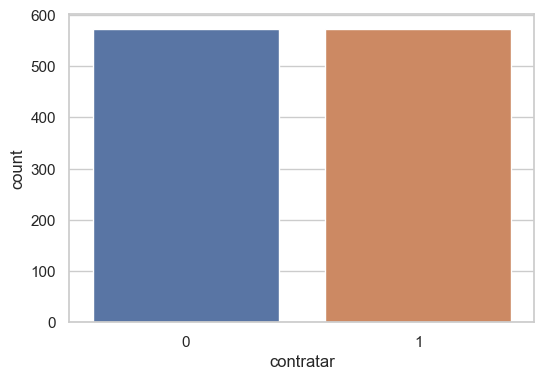

In [136]:
# Comprobar el balanceo de los datos:
data_balanceado = pd.DataFrame(y_b)

# Barplot de la variable output- frecuencias absolutas
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=respuesta[0],data = data_balanceado)
plt.show()

In [137]:
# Me quedo con el vector identificado de las filas que tengo en el data frame de balanceo
idx_b = X_b['idx'] # guardo el identificador de la fila que tengo en los datos de balanceo
X_b = X_b.drop("idx",axis=1) # quito la columna que es una dummy
idx_b

0         48
1        561
2       1786
3        580
4       1365
        ... 
1141    1372
1142    1639
1143     919
1144     502
1145     537
Name: idx, Length: 1146, dtype: int64

In [138]:
# Creo un data frame de las entradas con los datos que he quitado del balanceo
X_no_used = X_.drop(idx_b,axis = 0)
X_no_used.head()

,edad,tipo_empleo,universitario,ingresos,num_familia,enfermedad,frecuente,extranjero
2,34,1,1,500000,4,1,0,0
4,28,1,1,700000,8,1,1,0
6,31,0,1,1300000,4,0,0,0
7,31,1,1,1350000,3,0,1,1
9,33,0,1,800000,3,0,1,0


In [139]:
# Creo una nueva variable de salida con los datos que he quitado en el balanceo
y_no_used = y_.drop(idx_b,axis = 0)
y_no_used.head()

2    1
4    0
6    0
7    1
9    0
Name: contratar, dtype: int64

In [140]:
# Renombrar los datos balanceados de training como X_train y Y_train:
X_train = X_b.copy()
Y_train = y_b.copy()

In [141]:
len(X_train), len(Y_train)

(1146, 1146)

## Definir el training

Hay varias opciones de subsmapling para evitar el overfitting del algoritmo.

    • Crear 10 grupos de 3 repeticiones – k-fold
    • Crear 100 nuevos grupos generando la muestra a partir de la distribución de training data- bootstraping
    • Quitar una variable de entrada cada vez – LOOCV

El más común y utilizado es el k-fold validation.

Las trasnformaciones más comunes son:

    .- La estandarización de los datos
    .- Las trasnformaciones de Yule-Johnson y Box-Cox (normalizar los datos para variables cuantitativas y positivas)
    .- El principal component analysis (PCA)

In [142]:
# Defenimos el subsampling y el seed number
num_folds = 10
seed = 7
scoring = 'accuracy'

## Training de algoritmos sencillos - sin estandarizar

Estos son los algorimos básicos sin estandarizar:
- Logistic regresion - LR
- Linear discriminant analysis - LDA
- Los k vecinos mas cercanos - KNN
- Árbol de clasificación - CART
- Naive bayes - NB
- Support vector machine radial - SVM

In [143]:
# Definimos los algoritmos basicos
models = []
#crear los nombres de los modelos
nombres = []
models.append(('LR', LogisticRegression(solver='liblinear')))
nombres.append('LogisticRegression')
models.append(('LDA', LinearDiscriminantAnalysis()))
nombres.append('LinearDiscriminantAnalysis')
models.append(('KNN', KNeighborsClassifier()))
nombres.append('KNeighborsClassifier')
models.append(('CART', DecisionTreeClassifier()))
nombres.append('DecisionTreeClassifier')
models.append(('NB', GaussianNB()))
nombres.append('GaussianNB')
models.append(('SVM', SVC(gamma='auto')))
nombres.append('SVM')

In [144]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_bas = pd.DataFrame({'Accuracy' : np.empty(len(models))})
res_alg_bas.index = nombres

**************************************
**************************************
Algoritmo:  LR
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.499962 (0.049371)
Predicción de Validación:
Accuracy: 
0.3442211055276382
La matriz de confusión: 
[[137   0]
 [261   0]]


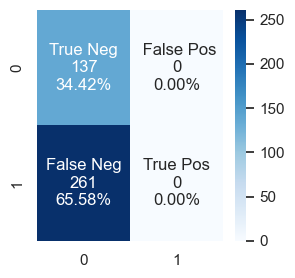

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       261
           1       0.34      1.00      0.51       137

    accuracy                           0.34       398
   macro avg       0.17      0.50      0.26       398
weighted avg       0.12      0.34      0.18       398

**************************************
**************************************
Algoritmo:  LDA
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.653616 (0.045620)
Predicción de Validación:
Accuracy: 
0.6733668341708543
La matriz de confusión: 
[[100  37]
 [ 93 168]]


c:\Users\Admin\Documents\GitHub_Publicos\viajes_contratar_seguro\desa_viajes\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\Documents\GitHub_Publicos\viajes_contratar_seguro\desa_viajes\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\Documents\GitHub_Publicos\viajes_contratar_seguro\desa_viajes\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

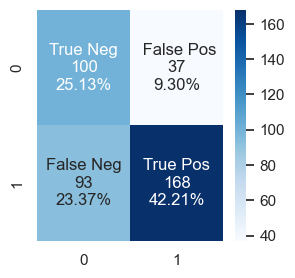

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       261
           1       0.52      0.73      0.61       137

    accuracy                           0.67       398
   macro avg       0.67      0.69      0.66       398
weighted avg       0.72      0.67      0.68       398

**************************************
**************************************
Algoritmo:  KNN
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.767010 (0.034224)
Predicción de Validación:
Accuracy: 
0.7839195979899497
La matriz de confusión: 
[[ 86  51]
 [ 35 226]]


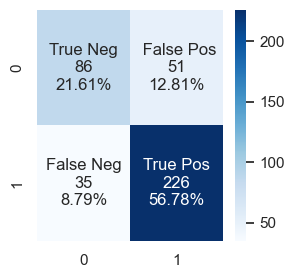

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       261
           1       0.71      0.63      0.67       137

    accuracy                           0.78       398
   macro avg       0.76      0.75      0.75       398
weighted avg       0.78      0.78      0.78       398

**************************************
**************************************
Algoritmo:  CART
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.744363 (0.039151)
Predicción de Validación:
Accuracy: 
0.7437185929648241
La matriz de confusión: 
[[ 92  45]
 [ 57 204]]


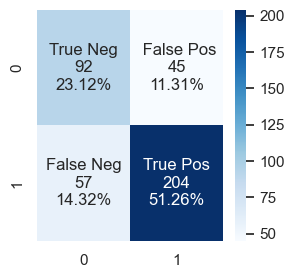

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       261
           1       0.62      0.67      0.64       137

    accuracy                           0.74       398
   macro avg       0.72      0.73      0.72       398
weighted avg       0.75      0.74      0.75       398

**************************************
**************************************
Algoritmo:  NB
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.644935 (0.051411)
Predicción de Validación:
Accuracy: 
0.6859296482412061
La matriz de confusión: 
[[ 94  43]
 [ 82 179]]


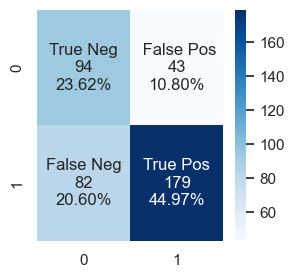

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       261
           1       0.53      0.69      0.60       137

    accuracy                           0.69       398
   macro avg       0.67      0.69      0.67       398
weighted avg       0.71      0.69      0.69       398

**************************************
**************************************
Algoritmo:  SVM
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.760069 (0.030990)
Predicción de Validación:
Accuracy: 
0.7663316582914573
La matriz de confusión: 
[[ 89  48]
 [ 45 216]]


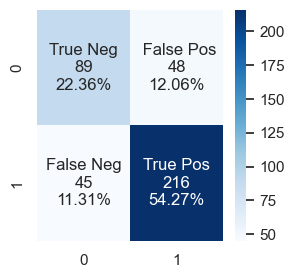

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       261
           1       0.66      0.65      0.66       137

    accuracy                           0.77       398
   macro avg       0.74      0.74      0.74       398
weighted avg       0.77      0.77      0.77       398

CPU times: total: 2.59 s
Wall time: 2.64 s


In [145]:
%%time
results = []
names = []
j = 0

# evaluamos los algoritmos basicos
for name, model in models:
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print('**************************************')
    print("Algoritmo: ", name)
    print('**************************************')
    msg = "%s: %f (%f)" % ("Promedio y validación del Accuracy", cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    #Accuracy
    print("Accuracy: ")
    acc = accuracy_score(Y_validation, predictions)
    res_alg_bas['Accuracy'].loc[nombres[j]] = acc
    j = j+1
    print(acc)
    print("La matriz de confusión: ")
    cf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
    #cf_matrix = (np.transpose(confusion_matrix(Y_validation, predictions, labels=[1,0])))
    print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
    plt.figure(figsize=(3, 3))
    group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    print("Las metricas principales: ")
    print(classification_report(Y_validation, predictions))

In [146]:
#mostrarmos el resultado de cada algoritmo
#res_alg_bas
print(res_alg_bas.sort_values(by=['Accuracy'], ascending=False))

                            Accuracy
KNeighborsClassifier        0.783920
SVM                         0.766332
DecisionTreeClassifier      0.743719
GaussianNB                  0.685930
LinearDiscriminantAnalysis  0.673367
LogisticRegression          0.344221


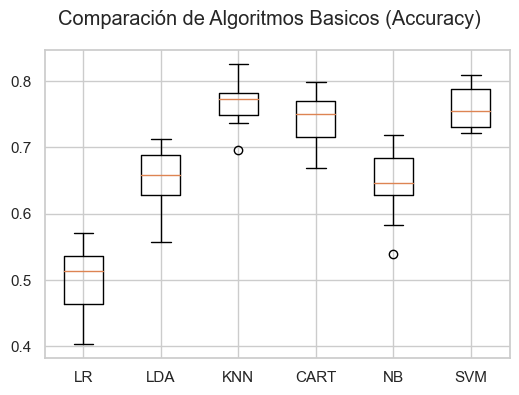

In [147]:
# Comparamos los algoritmos
fig = pyplot.figure()
fig.suptitle('Comparación de Algoritmos Basicos (Accuracy)')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Training de algoritmos sencillos - estandarizados

Estos son los algorimos básicos estandarizados:

- Logistic regresion - LR
- Linear discriminant analysis - LDA
- Los k vecinos mas cercanos - KNN
- Árbol de clasificación - CART
- Naive bayes - NB
- Support vector machine radial - SVM

In [148]:
# Definimos el pipeline con estandarizacion y el modelo:
models_std = []
#crear los nombres de los modelos
nombres_models_std = []
models_std.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
nombres_models_std.append('ScaledLR')
models_std.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
nombres_models_std.append('ScaledLDA')
models_std.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
nombres_models_std.append('ScaledKNN')
models_std.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
nombres_models_std.append('ScaledCART')
models_std.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
nombres_models_std.append('ScaledNB')
models_std.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
nombres_models_std.append('ScaledSVM')

In [149]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_bas_est = pd.DataFrame({'Accuracy' : np.empty(len(models_std))})
res_alg_bas_est.index = nombres_models_std

**************************************
**************************************
Algoritmo:  ScaledLR
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.654470 (0.043236)
Predicción de Validación:
Accuracy: 
0.6758793969849246
La matriz de confusión: 
[[ 99  38]
 [ 91 170]]


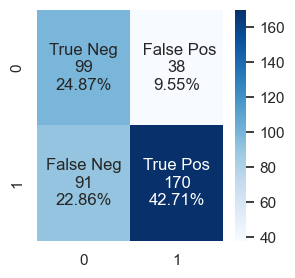

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.65      0.72       261
           1       0.52      0.72      0.61       137

    accuracy                           0.68       398
   macro avg       0.67      0.69      0.67       398
weighted avg       0.72      0.68      0.68       398

**************************************
**************************************
Algoritmo:  ScaledLDA
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.653616 (0.045620)
Predicción de Validación:
Accuracy: 
0.6733668341708543
La matriz de confusión: 
[[100  37]
 [ 93 168]]


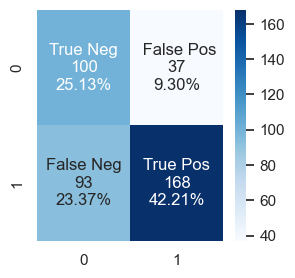

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       261
           1       0.52      0.73      0.61       137

    accuracy                           0.67       398
   macro avg       0.67      0.69      0.66       398
weighted avg       0.72      0.67      0.68       398

**************************************
**************************************
Algoritmo:  ScaledKNN
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.722540 (0.052397)
Predicción de Validación:
Accuracy: 
0.7738693467336684
La matriz de confusión: 
[[ 88  49]
 [ 41 220]]


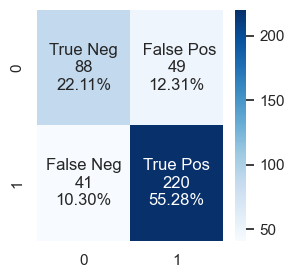

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       261
           1       0.68      0.64      0.66       137

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.75       398
weighted avg       0.77      0.77      0.77       398

**************************************
**************************************
Algoritmo:  ScaledCART
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.748711 (0.043058)
Predicción de Validación:
Accuracy: 
0.7462311557788944
La matriz de confusión: 
[[ 92  45]
 [ 56 205]]


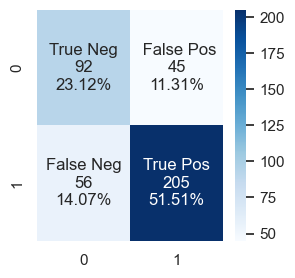

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       261
           1       0.62      0.67      0.65       137

    accuracy                           0.75       398
   macro avg       0.72      0.73      0.72       398
weighted avg       0.75      0.75      0.75       398

**************************************
**************************************
Algoritmo:  ScaledNB
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.678040 (0.046588)
Predicción de Validación:
Accuracy: 
0.6984924623115578
La matriz de confusión: 
[[101  36]
 [ 84 177]]


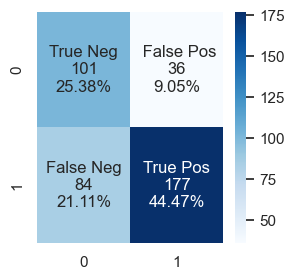

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       261
           1       0.55      0.74      0.63       137

    accuracy                           0.70       398
   macro avg       0.69      0.71      0.69       398
weighted avg       0.73      0.70      0.71       398

**************************************
**************************************
Algoritmo:  ScaledSVM
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.758276 (0.049516)
Predicción de Validación:
Accuracy: 
0.821608040201005
La matriz de confusión: 
[[ 89  48]
 [ 23 238]]


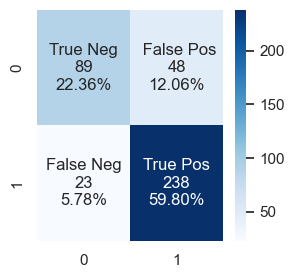

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       261
           1       0.79      0.65      0.71       137

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.82      0.82      0.82       398

CPU times: total: 2.72 s
Wall time: 2.75 s


In [150]:
%%time
results = []
names = []
j = 0

# evaluamos los algoritmos basicos
for name, model in models_std:
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print('**************************************')
    print("Algoritmo: ", name)
    print('**************************************')
    msg = "%s: %f (%f)" % ("Promedio y validación del Accuracy", cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    #Accuracy
    print("Accuracy: ")
    acc = accuracy_score(Y_validation, predictions)
    res_alg_bas_est['Accuracy'].loc[nombres_models_std[j]] = acc
    j = j+1
    print(acc)
    print("La matriz de confusión: ")
    cf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
    #cf_matrix = (np.transpose(confusion_matrix(Y_validation, predictions, labels=[1,0])))
    print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
    plt.figure(figsize=(3, 3))
    group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    print("Las metricas principales: ")
    print(classification_report(Y_validation, predictions))

In [151]:
#mostrarmos el resultado de cada algoritmo, ordenador asc
#res_alg_bas_est.sort_values('Accuracy')
print(res_alg_bas_est.sort_values(by=['Accuracy'], ascending=False))

            Accuracy
ScaledSVM   0.821608
ScaledKNN   0.773869
ScaledCART  0.746231
ScaledNB    0.698492
ScaledLR    0.675879
ScaledLDA   0.673367


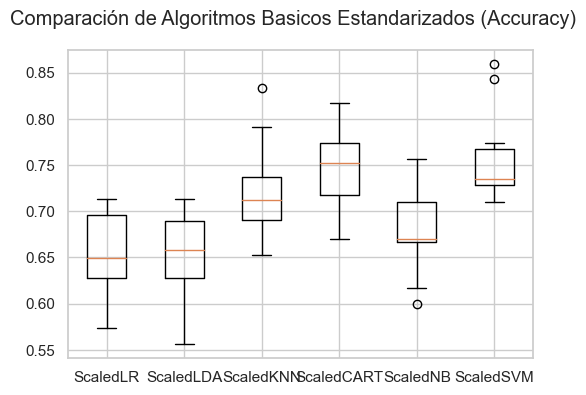

In [152]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos Basicos Estandarizados (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Training de algoritmos avanzados - sin estandarizar

Los algoritmos avanzados que vamos a utilizar son los siguientes:
- Ada Boost Classifier - AB
- Stochastic Gradient Boosting - GBM
- Random Forest - RF
- Extra tree classifier - ET

In [153]:
# Definimos los algoritmos
models_ava = []
#crear los nombres de los modelos
nombres_models_ava = []
models_ava.append(('AB', AdaBoostClassifier()))
nombres_models_ava.append('AdaBoostClassifier')
models_ava.append(('GBM', GradientBoostingClassifier()))
nombres_models_ava.append('GradientBoostingClassifier')
models_ava.append(('RF', RandomForestClassifier(n_estimators=10)))
nombres_models_ava.append('RandomForestClassifier')
models_ava.append(('ET', ExtraTreesClassifier(n_estimators=10)))
nombres_models_ava.append('ExtraTreesClassifier')

In [154]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_ava = pd.DataFrame({'Accuracy' : np.empty(len(models_ava))})
res_alg_ava.index = nombres_models_ava

**************************************
**************************************
Algoritmo:  AB
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.748749 (0.039049)
Predicción de Validación:
Accuracy: 
0.7562814070351759
La matriz de confusión: 
[[ 90  47]
 [ 50 211]]


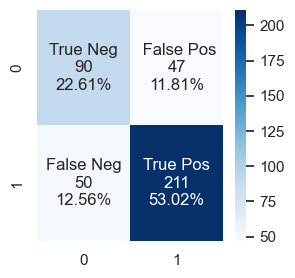

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       261
           1       0.64      0.66      0.65       137

    accuracy                           0.76       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.76      0.76      0.76       398

**************************************
**************************************
Algoritmo:  GBM
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.777475 (0.040624)
Predicción de Validación:
Accuracy: 
0.8090452261306532
La matriz de confusión: 
[[ 85  52]
 [ 24 237]]


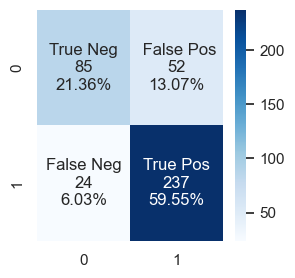

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       261
           1       0.78      0.62      0.69       137

    accuracy                           0.81       398
   macro avg       0.80      0.76      0.78       398
weighted avg       0.81      0.81      0.80       398

**************************************
**************************************
Algoritmo:  RF
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.732143 (0.046362)
Predicción de Validación:
Accuracy: 
0.7587939698492462
La matriz de confusión: 
[[ 95  42]
 [ 54 207]]


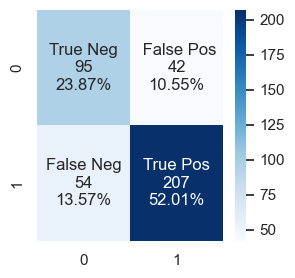

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       261
           1       0.64      0.69      0.66       137

    accuracy                           0.76       398
   macro avg       0.73      0.74      0.74       398
weighted avg       0.76      0.76      0.76       398

**************************************
**************************************
Algoritmo:  ET
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.732143 (0.039012)
Predicción de Validación:
Accuracy: 
0.7512562814070352
La matriz de confusión: 
[[ 88  49]
 [ 50 211]]


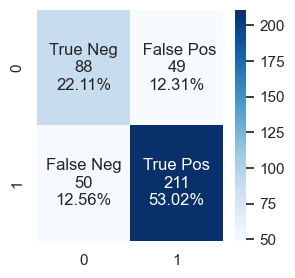

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       261
           1       0.64      0.64      0.64       137

    accuracy                           0.75       398
   macro avg       0.72      0.73      0.72       398
weighted avg       0.75      0.75      0.75       398

CPU times: total: 4.44 s
Wall time: 4.49 s


In [155]:
%%time
results = []
names = []
j = 0

# evaluamos los algoritmos basicos
for name, model in models_ava:
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print('**************************************')
    print("Algoritmo: ", name)
    print('**************************************')
    msg = "%s: %f (%f)" % ("Promedio y validación del Accuracy", cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    #Accuracy
    print("Accuracy: ")
    acc = accuracy_score(Y_validation, predictions)
    res_alg_ava['Accuracy'].loc[nombres_models_ava[j]] = acc
    j = j+1
    print(acc)
    print("La matriz de confusión: ")
    cf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
    #cf_matrix = (np.transpose(confusion_matrix(Y_validation, predictions, labels=[1,0])))
    print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
    plt.figure(figsize=(3, 3))
    group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    print("Las metricas principales: ")
    print(classification_report(Y_validation, predictions))

In [156]:
#mostrarmos el resultado de cada algoritmo, ordenador asc
#res_alg_bas_est.sort_values('Accuracy')
print(res_alg_ava.sort_values(by=['Accuracy'], ascending=False))

                            Accuracy
GradientBoostingClassifier  0.809045
RandomForestClassifier      0.758794
AdaBoostClassifier          0.756281
ExtraTreesClassifier        0.751256


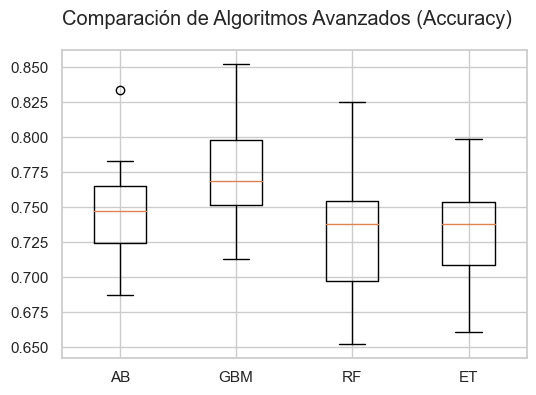

In [157]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos Avanzados (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Training de algoritmos avanzados - estandarizados

Los algoritmos avanzados que vamos a utilizar son los siguientes:
- Ada Boost Classifier - AB
- Stochastic Gradient Boosting - GBM
- Random Forest - RF
- Extra tree classifier - ET

In [158]:
# Definimos el pipeline con estandarizacion y el modelo:
models_ava_std = []
#crear los nombres de los modelos
nombres_models_ava_std = []
models_ava_std.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', GradientBoostingClassifier())])))
nombres_models_ava_std.append('ScaledAB')
models_ava_std.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', KNeighborsClassifier())])))
nombres_models_ava_std.append('ScaledGBM')
models_ava_std.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
nombres_models_ava_std.append('ScaledRF')
models_ava_std.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
nombres_models_ava_std.append('ScaledET')

In [159]:
# crear una data frame con 1 columna y un vector (basura) con la longitud de models
# para almacenar los resultados de Accuracy de cada uno de los modelos
res_alg_ava_est = pd.DataFrame({'Accuracy' : np.empty(len(models_ava_std))})
res_alg_ava_est.index = nombres_models_ava_std

**************************************
**************************************
Algoritmo:  ScaledAB
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.777475 (0.040624)
Predicción de Validación:
Accuracy: 
0.8090452261306532
La matriz de confusión: 
[[ 85  52]
 [ 24 237]]


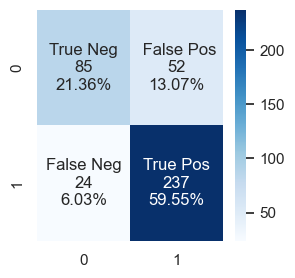

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       261
           1       0.78      0.62      0.69       137

    accuracy                           0.81       398
   macro avg       0.80      0.76      0.78       398
weighted avg       0.81      0.81      0.80       398

**************************************
**************************************
Algoritmo:  ScaledGBM
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.722540 (0.052397)
Predicción de Validación:
Accuracy: 
0.7738693467336684
La matriz de confusión: 
[[ 88  49]
 [ 41 220]]


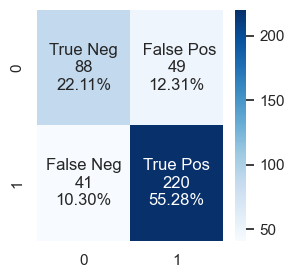

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       261
           1       0.68      0.64      0.66       137

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.75       398
weighted avg       0.77      0.77      0.77       398

**************************************
**************************************
Algoritmo:  ScaledRF
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.745286 (0.042882)
Predicción de Validación:
Accuracy: 
0.7286432160804021
La matriz de confusión: 
[[ 93  44]
 [ 64 197]]


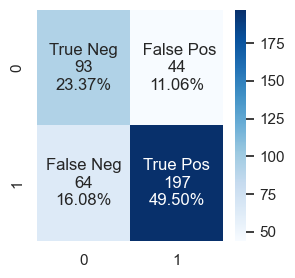

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       261
           1       0.59      0.68      0.63       137

    accuracy                           0.73       398
   macro avg       0.70      0.72      0.71       398
weighted avg       0.74      0.73      0.73       398

**************************************
**************************************
Algoritmo:  ScaledET
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.736522 (0.051449)
Predicción de Validación:
Accuracy: 
0.7537688442211056
La matriz de confusión: 
[[ 90  47]
 [ 51 210]]


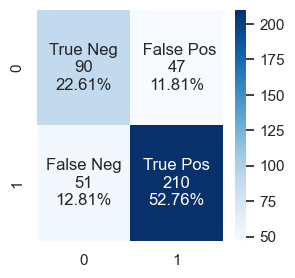

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       261
           1       0.64      0.66      0.65       137

    accuracy                           0.75       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.76      0.75      0.75       398

CPU times: total: 3.31 s
Wall time: 3.37 s


In [160]:
%%time
results = []
names = []
j = 0

# evaluamos los algoritmos basicos
for name, model in models_ava_std:
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print('**************************************')
    print("Algoritmo: ", name)
    print('**************************************')
    msg = "%s: %f (%f)" % ("Promedio y validación del Accuracy", cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    #Accuracy
    print("Accuracy: ")
    acc = accuracy_score(Y_validation, predictions)
    res_alg_ava_est['Accuracy'].loc[nombres_models_ava_std[j]] = acc
    j = j+1
    print(acc)
    print("La matriz de confusión: ")
    cf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
    #cf_matrix = (np.transpose(confusion_matrix(Y_validation, predictions, labels=[1,0])))
    print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
    plt.figure(figsize=(3, 3))
    group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    print("Las metricas principales: ")
    print(classification_report(Y_validation, predictions))

In [161]:
#mostrarmos el resultado de cada algoritmo, ordenador asc
#res_alg_bas_est.sort_values('Accuracy')
print(res_alg_ava_est.sort_values(by=['Accuracy'], ascending=False))

           Accuracy
ScaledAB   0.809045
ScaledGBM  0.773869
ScaledET   0.753769
ScaledRF   0.728643


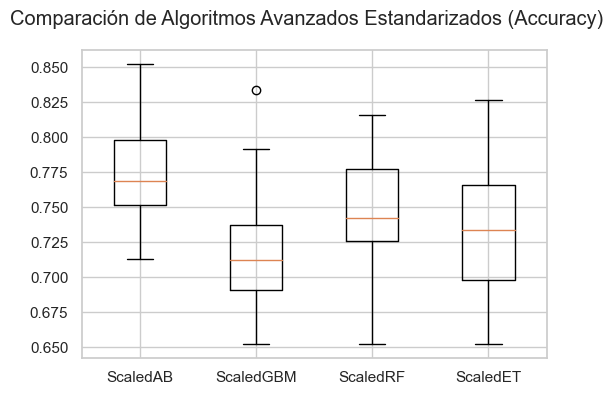

In [162]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos Avanzados Estandarizados (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## EJEMPLO: Tunning - optimización

In [163]:
%%time
# defining parameter range
#parameter grid takes a dictionary containg list of values of each hyperparameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_validation, Y_validation)
# print best parameter after tuning
print(grid.best_params_)
#output
#{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
#output
#SVC(C=100, gamma=0.0001)
#testing the model
grid_predictions = grid.predict(X_validation)
print(classification_report(Y_validation, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.762 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [164]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [165]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [166]:
print(classification_report(Y_validation, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       261
           1       0.91      0.59      0.72       137

    accuracy                           0.84       398
   macro avg       0.86      0.78      0.80       398
weighted avg       0.85      0.84      0.83       398



In [167]:
#R2 
grid.best_score_

0.7991772151898734

# Modelo ganador

In [168]:
#concatenar los dataframes
df_resultados = pd.DataFrame()
df_resultados = pd.concat([df_resultados, res_alg_bas])
df_resultados = pd.concat([df_resultados, res_alg_bas_est])
df_resultados = pd.concat([df_resultados, res_alg_ava])
df_resultados = pd.concat([df_resultados, res_alg_ava_est])
df_resultados.sort_values(by=['Accuracy'], ascending=False)

,Accuracy
ScaledSVM,0.821608
ScaledAB,0.809045
GradientBoostingClassifier,0.809045
KNeighborsClassifier,0.783920
ScaledGBM,0.773869
ScaledKNN,0.773869
SVM,0.766332
RandomForestClassifier,0.758794
AdaBoostClassifier,0.756281
ScaledET,0.753769


In [169]:
#obtener la fila del mejor resultado
df_resultados.sort_values(by=['Accuracy'], ascending=False).iloc[0,:]

Accuracy    0.821608
Name: ScaledSVM, dtype: float64

In [170]:
#obtener la fila del mejor resultado
df_resultados.sort_values(by=['Accuracy'], ascending=False).iloc[0,0]

0.821608040201005

# Curva ROC

In [171]:
best_algorit = []
nombres_best_algorit = []
best_algorit.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto', probability=True))])))
nombres_best_algorit.append('SVM')

**************************************
**************************************
Algoritmo:  ScaledSVM
**************************************
Predicción de Training:
Promedio y validación del Accuracy: 0.758276 (0.049516)
Predicción de Validación:
Accuracy: 
0.821608040201005
La matriz de confusión: 
[[ 89  48]
 [ 23 238]]


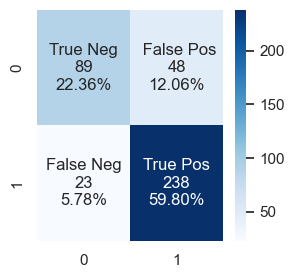

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       261
           1       0.79      0.65      0.71       137

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.82      0.82      0.82       398

CPU times: total: 2.47 s
Wall time: 2.51 s


In [172]:
%%time
results = []
names = []
j = 0

# evaluamos los algoritmos basicos
for name, model in best_algorit:
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print('**************************************')
    print("Algoritmo: ", name)
    print('**************************************')
    msg = "%s: %f (%f)" % ("Promedio y validación del Accuracy", cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    #Accuracy
    print("Accuracy: ")
    acc = accuracy_score(Y_validation, predictions)
    #res_alg_ava_est['Accuracy'].loc[nombres_models_ava_std[j]] = acc
    #j = j+1
    print(acc)
    print("La matriz de confusión: ")
    cf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
    #cf_matrix = (np.transpose(confusion_matrix(Y_validation, predictions, labels=[1,0])))
    print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
    plt.figure(figsize=(3, 3))
    group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    print("Las metricas principales: ")
    print(classification_report(Y_validation, predictions))

No Contrata: ROC AUC=0.500
Model: ROC AUC=0.818


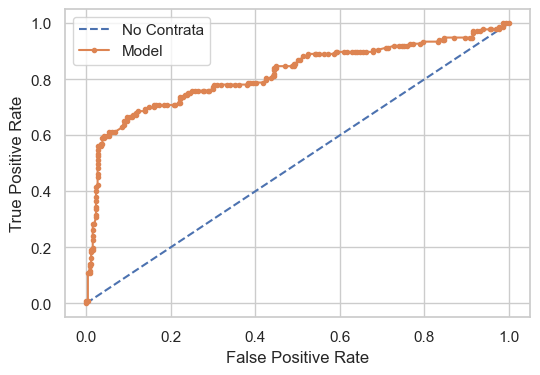

In [175]:
predictions_prob = model.predict_proba(X_validation) # predicción probabilidades

df_validation = pd.DataFrame(Y_validation)
df_validation.columns = ['Real']
df_validation['Prob_NO_Contrata'] = predictions_prob[:,0]
df_validation['Prob_SI_Contrata'] = predictions_prob[:,1]
df_validation['Prediccion'] = model.predict(X_validation)
df_validation['Error'] = abs(df_validation['Real']-df_validation['Prediccion'])
df_validation['Diff_Abs'] = abs(df_validation['Prob_NO_Contrata']-df_validation['Prob_SI_Contrata'])


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Y_validation_mod  = Y_validation
ns_probs = [0 for _ in range(len(Y_validation_mod))]
# predict probabilities
lr_probs = predictions_prob
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation_mod, ns_probs)
lr_auc = roc_auc_score(Y_validation_mod, lr_probs)
# summarize scores
print('No Contrata: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation_mod, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(Y_validation_mod, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Contrata')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Conclusiones finales

EL MODELO GANADOR
*************************************
[[ 89  48]
 [ 23 238]]


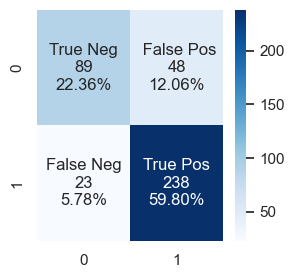

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       261
           1       0.79      0.65      0.71       137

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.82      0.82      0.82       398



In [178]:
print("EL MODELO GANADOR")
print("*************************************")
print(cf_matrix)
# definir los valores para mostrar la matriz de confusión
plt.figure(figsize=(3, 3))
group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()
print("Las metricas principales: ")
print(classification_report(Y_validation, predictions))

El modelo ganador es el algoritmo <b>ScaledSVM</b>, estas son sus metricas para los datos de <b>test</b>.

La matriz de confusión, nos indica:
- El valor 89, <b>True Neg</b>, es decir la clase actual es negativa y la clase predicha es negativa, es decir es 0 y se predice 0.
- El valor 23, <b>False Neg</b>, es decir la clase actual es positiva y la clase predicha es negativa, es decir es 1 y se predice 0.
- El valor 48, <b>False Pos</b>, es decir la clase actual es negativa y la clase predicha es positiva, es decir es 0 y se predice 1.
- El valor 238, <b>True Pos</b>, es decir la clase actual es positiva y la clase predicha es tambien positiva, es decir es 1 y se predice 1.


Las metricas nos indican para los datos de <b>test</b>:

- <b>Accuracy</b>, con un valor de <b>82%</b>, es el valor más representativo (si los datos están balanceados, como es el caso), el cual nos indica como de bien lo ha hecho el algortimo, es decir lo que ha clasificado de forma correcta tanto de forma positiva como negativa.

- <b>Precisión</b>, nos indica el % de casos positivos en los que el clasificador los ha identificado como positivos y realmente son casos negativos.

- <b>Sensibilidad o Recall</b>, con un valor de <b>92%</b>,nos indica el % de casos positivos en los que el clasificador los ha identificado como negativos y realmente son casos positivos.

- <b>Especificidad</b>,nos indica el % de casos negativos en los que el clasificador los ha identificado como positivos y realmente son casos negativos.